# ThinkClock Assignment submitted by Jeroen Brianraj

In [16]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

# Data processing

In [20]:
metadata_df = pd.read_csv("metadata.csv")
metadata_df.head(10)

type                                         start_time  \
0  discharge  [2010.       7.      21.      15.       0.    ...   
1  impedance  [2010.       7.      21.      16.      53.    ...   
2     charge  [2010.       7.      21.      17.      25.    ...   
3  impedance                    [2010    7   21   20   31    5]   
4  discharge  [2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...   
5     charge  [2010.       7.      21.      22.      38.    ...   
6  discharge  [2.010e+03 7.000e+00 2.200e+01 1.000e+00 4.000...   
7     charge  [2010.       7.      22.       3.      14.    ...   
8  discharge  [2010.       7.      22.       6.      16.    ...   
9     charge  [2010.       7.      22.       7.      50.    ...   

   ambient_temperature battery_id  test_id  uid   filename  \
0                    4      B0047        0    1  00001.csv   
1                   24      B0047        1    2  00002.csv   
2                    4      B0047        2    3  00003.csv   
3                   24      B0047        3    4  00004.csv   
4                    4      B0047        4    5  00005.csv   
5                    4      B0047        5    6  00006.csv   
6                    4      B0047        6    7  00007.csv   
7                    4      B0047        7    8  00008.csv   
8                    4      B0047        8    9  00009.csv   
9                    4      B0047        9   10  00010.csv   

             Capacity                   Re                  Rct  
0  1.6743047446975208                  NaN                  NaN  
1                 NaN  0.05605783343888099  0.20097016584458333  
2                 NaN                  NaN                  NaN  
3                 NaN  0.05319185850921101  0.16473399914864734  
4  1.5243662105099023                  NaN                  NaN  
5                 NaN                  NaN                  NaN  
6  1.5080762969973425                  NaN                  NaN  
7                 NaN                  NaN                  NaN  
8  1.4835577960067696                  NaN                  NaN  
9                 NaN                  NaN                  NaN

In [25]:
imp_files_df = metadata_df[metadata_df['type'] == 'impedance'][['start_time','filename','battery_id']]
ch_files_df = metadata_df[metadata_df['type'] == 'charge'][['start_time','filename','battery_id']]
dch_files_df = metadata_df[metadata_df['type'] == 'discharge'][['start_time','filename','battery_id']]

In [27]:
impedance_df = metadata_df[metadata_df['type']=='impedance'][['start_time', 'Re', 'Rct', 'battery_id']]
charge_df = metadata_df[metadata_df['type']=='charge'][['start_time', 'battery_id']]
discharge_df = metadata_df[metadata_df['type']=='discharge'][['start_time', 'Capacity', 'battery_id']]

In [29]:
from datetime import datetime
def convert_time(time):
    try:
        if isinstance(time, str):
            time = time.strip('[]').replace(',' , '')
            cont = [float(x) for x in time.split()]
            if len(cont) == 6:
                year, month, day, hour, minute = map(int, cont[:5])
                second = int(cont[5])
                return datetime(year, month, day, hour, minute, second)
            elif isinstance(time, (list,np.ndarray)) and len(time)== 6:
                year, month, day, hour, minute = map(int, time[:5])
                second = int(float(time[5]))
                return datetime(year, month, day, hour, minute, second)
    except (ValueError, SyntaxError, TypeError) as e:
        print("Failed to convert : {value}, Error: {e}")
        return pd.NaT

In [31]:
impedance_df['start_time'] = impedance_df['start_time'].apply(convert_time)
impedance_df = impedance_df.dropna(subset='start_time')
charge_df['start_time'] = charge_df['start_time'].apply(convert_time)
charge_df = charge_df.dropna(subset='start_time')
discharge_df['start_time'] = discharge_df['start_time'].apply(convert_time)
discharge_df = discharge_df.dropna(subset='start_time')

In [33]:
imp_files_df['start_time'] = imp_files_df['start_time'].apply(convert_time)
ch_files_df['start_time'] = ch_files_df['start_time'].apply(convert_time)
dch_files_df['start_time'] = dch_files_df['start_time'].apply(convert_time)

In [35]:
impedance_df = impedance_df.sort_values(by='start_time')
imp_files_df = imp_files_df.sort_values(by='start_time')
imp_files_df = imp_files_df.sort_values(by='battery_id')
charge_df = charge_df.sort_values(by='start_time')
ch_files_df = ch_files_df.sort_values(by='start_time')
ch_files_df = ch_files_df.sort_values(by='battery_id')
discharge_df = discharge_df.sort_values(by='start_time')
dch_files_df = dch_files_df.sort_values(by='start_time')
dch_files_df = dch_files_df.sort_values(by='battery_id')

# Question a) solution

In [37]:
bat_data = {}
for index, row in imp_files_df.iterrows():
    bat_id = row['battery_id']
    file = row['filename']
    start_time = row['start_time']

    file_path = f"data/{file}"
    try:
        data = pd.read_csv(file_path)
        if 'Battery_impedance' in data.columns:
            real_imp = data['Battery_impedance'].apply(lambda x: complex(x).real)
            real_imp_value = real_imp.tolist()
            imag_imp = data['Battery_impedance'].apply(lambda x: complex(x).imag)
            imag_imp_value = imag_imp.tolist()
            if bat_id not in bat_data:
                bat_data[bat_id] = {'start_time' : [], 'real_impedance' : [], 'imag_impedance': []}

            bat_data[bat_id]['start_time'].append(start_time)
            bat_data[bat_id]['real_impedance'].append(real_imp_value)
            bat_data[bat_id]['imag_impedance'].append(imag_imp_value)
        else:
            print(f"'Battery_impedance' column not found")
    except Exception as e:
        print(f"Error processing file {file} : {e}")

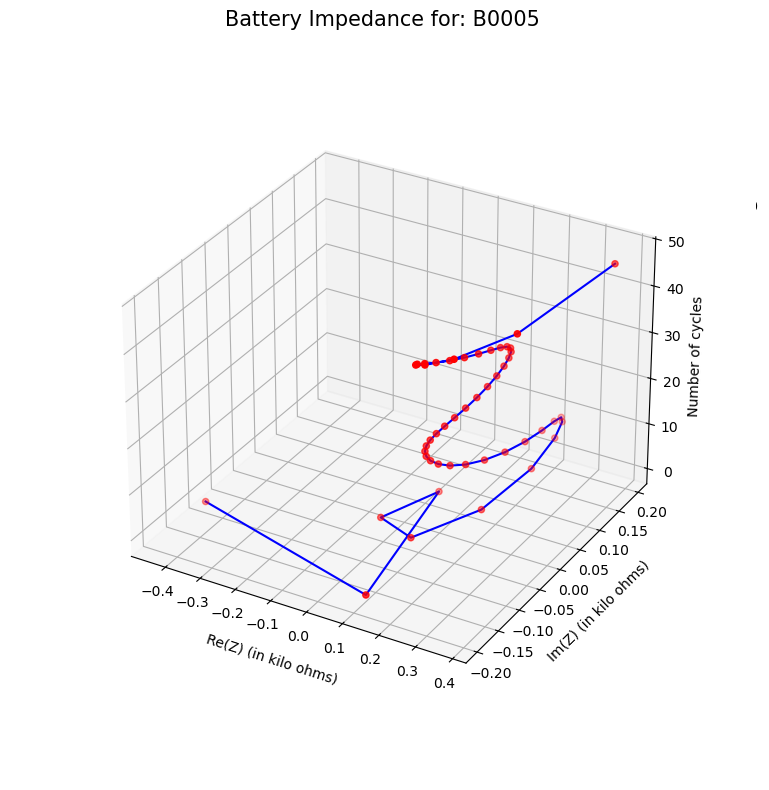

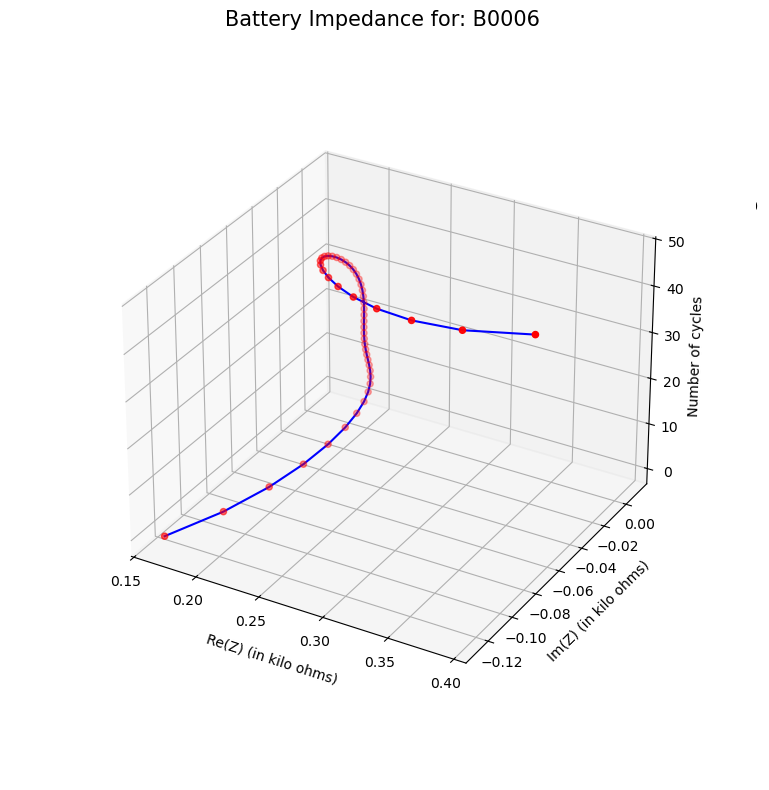

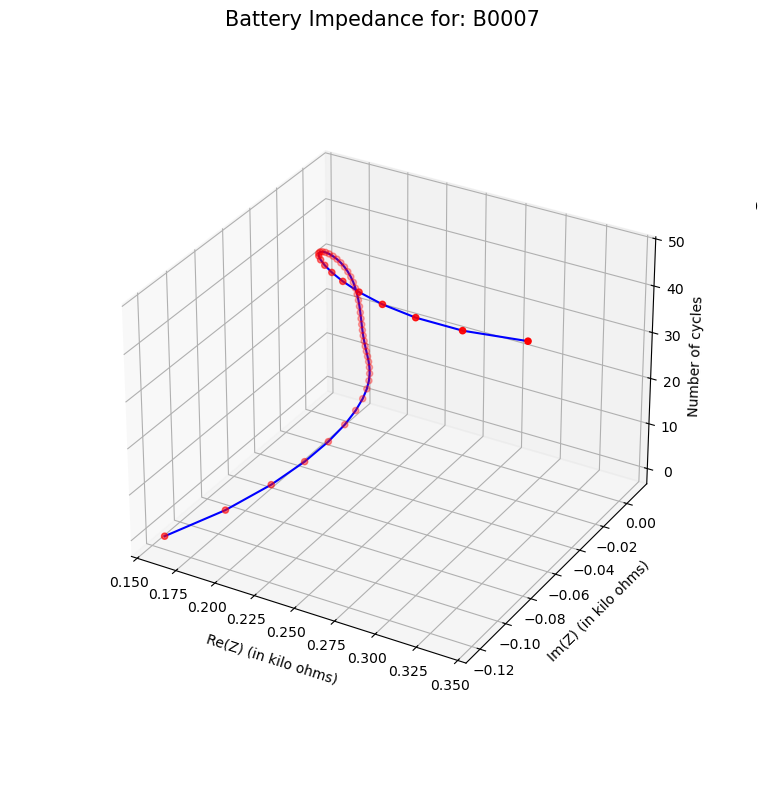

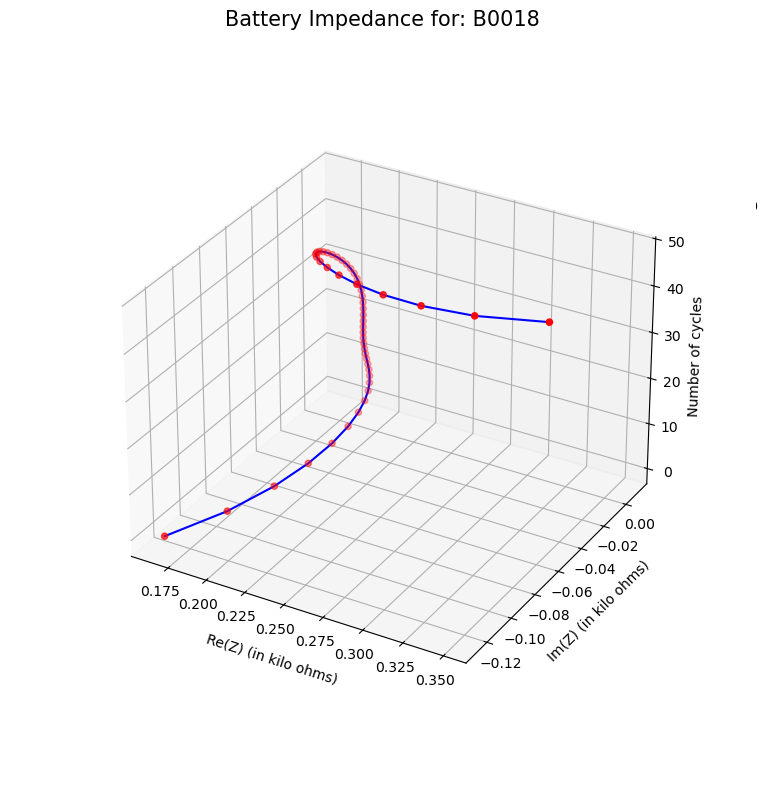

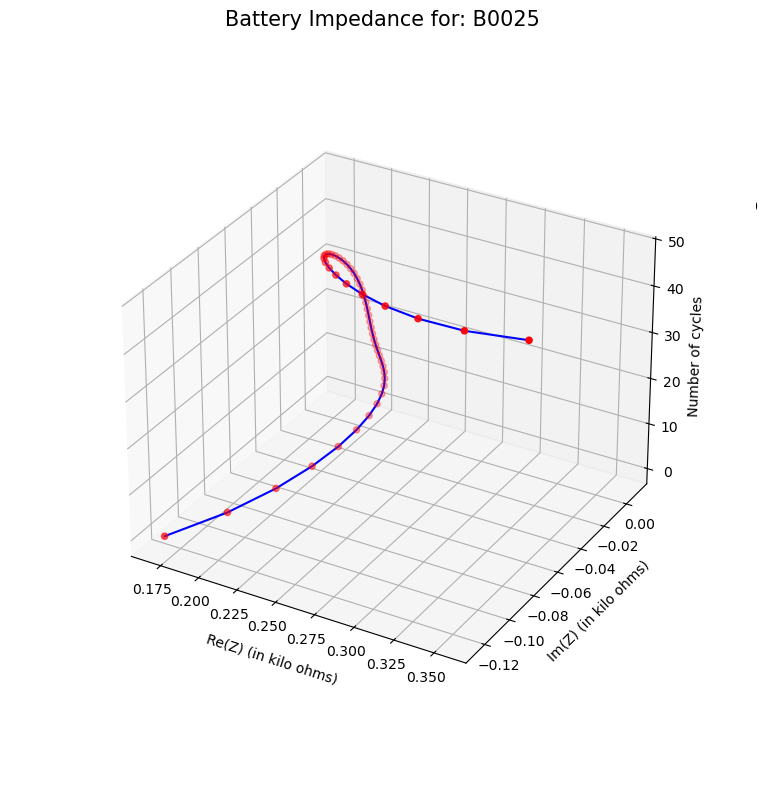

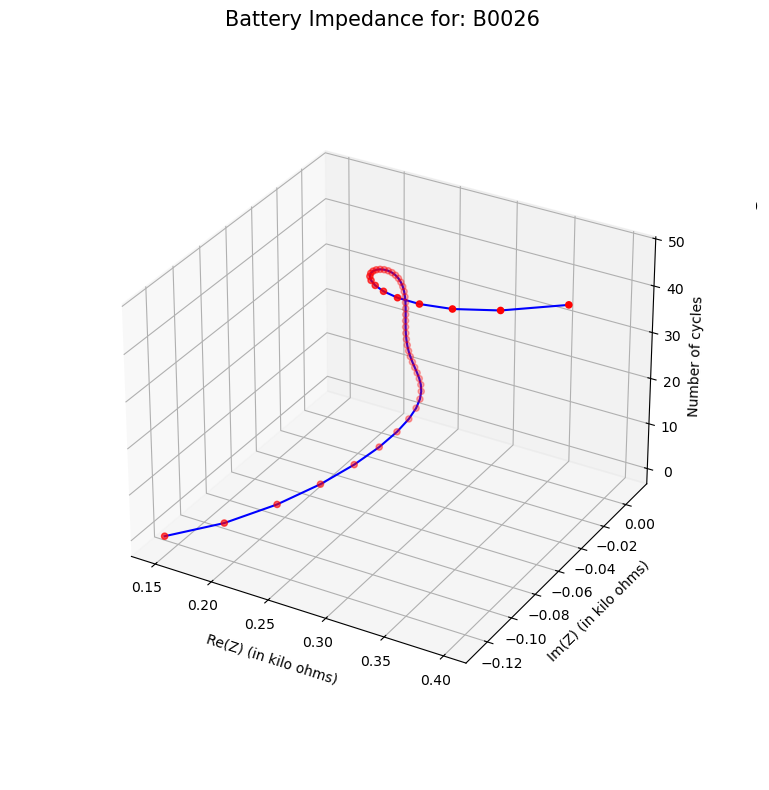

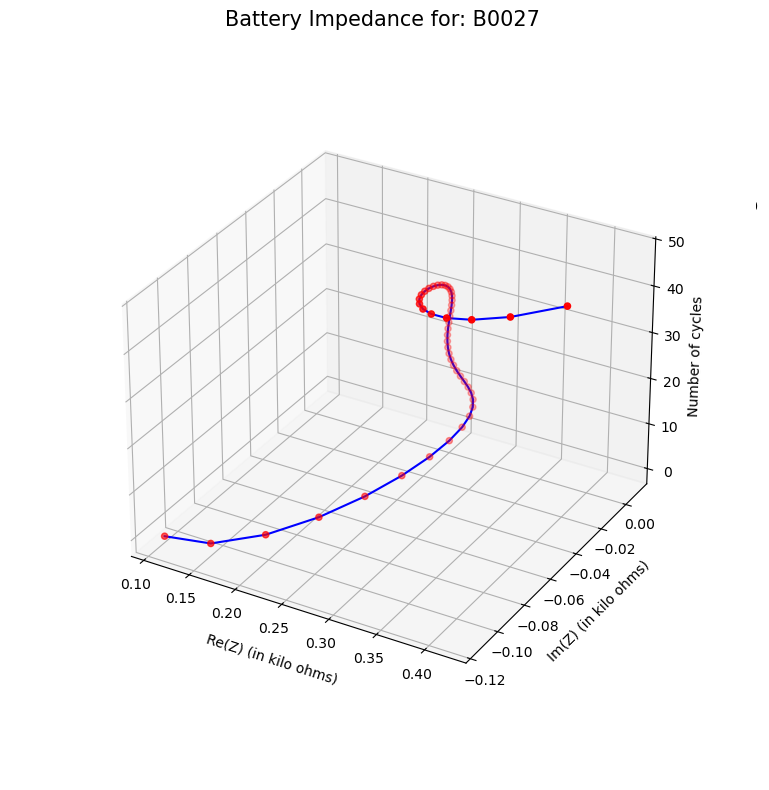

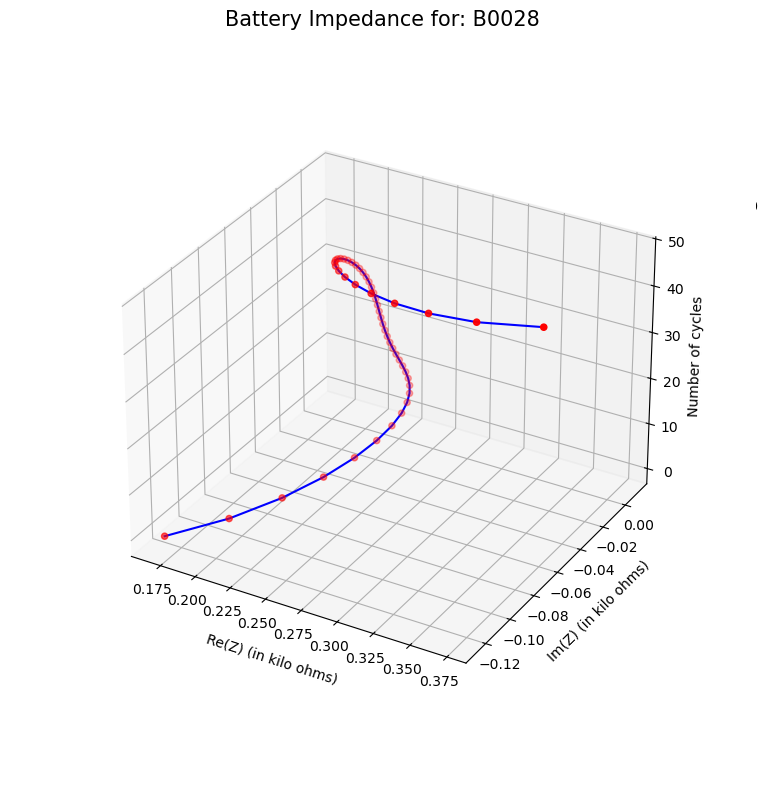

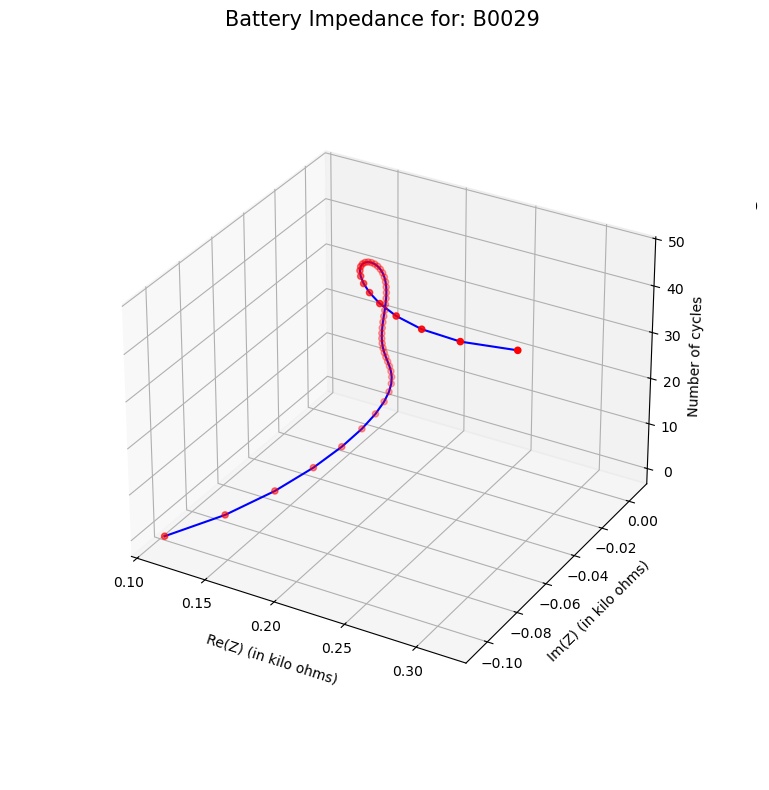

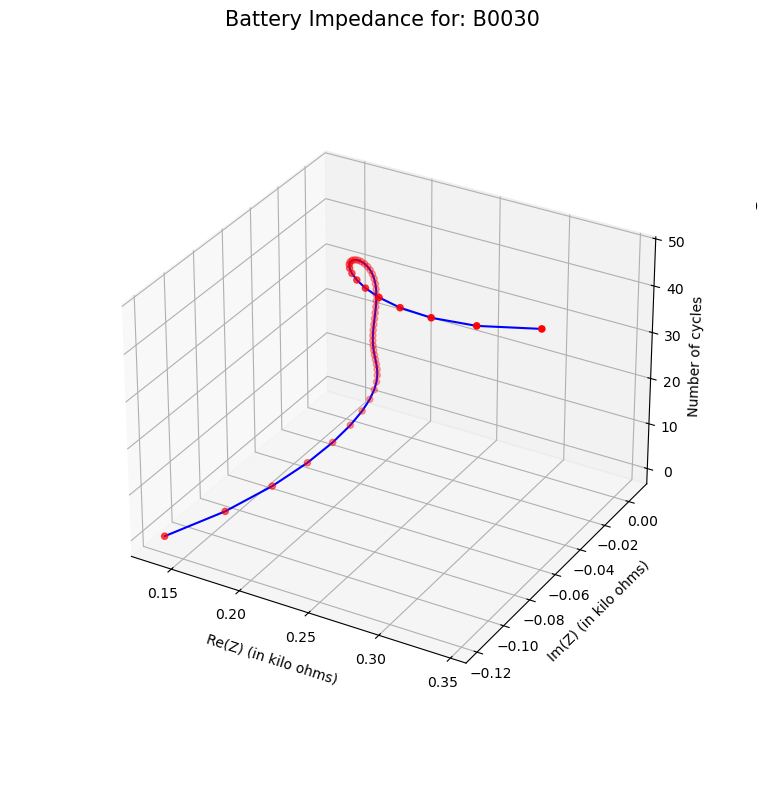

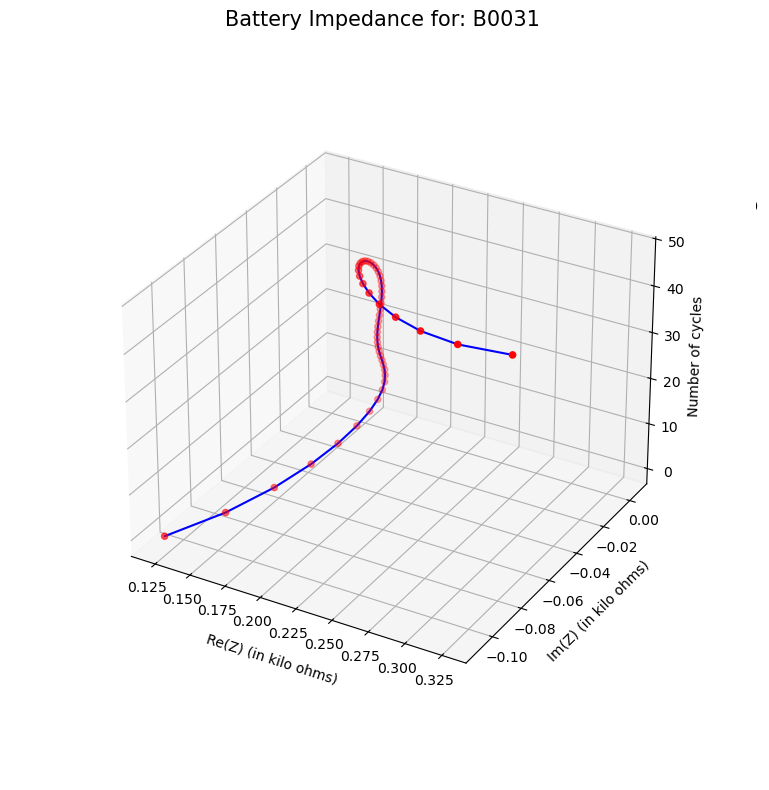

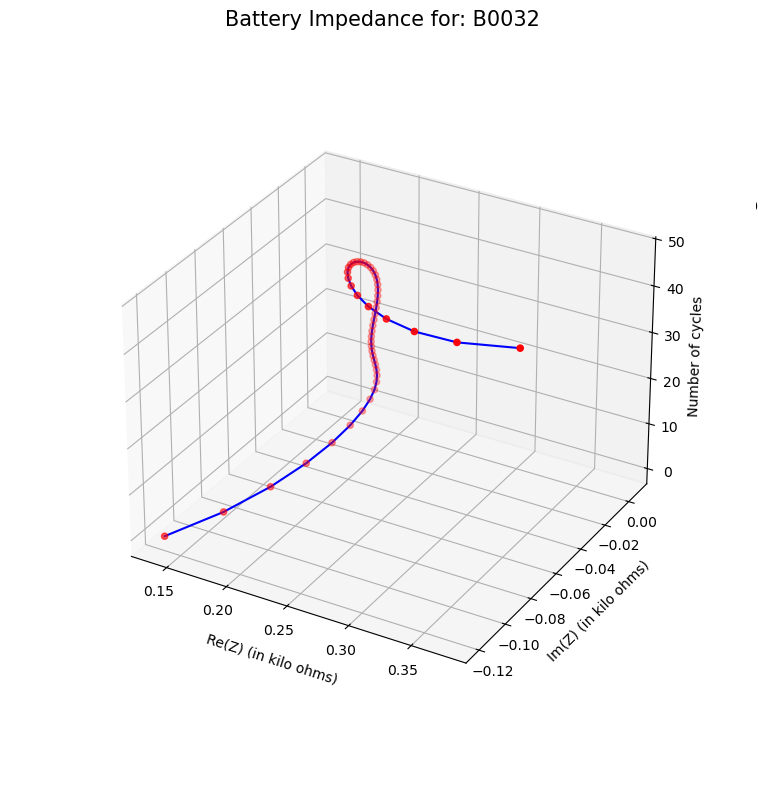

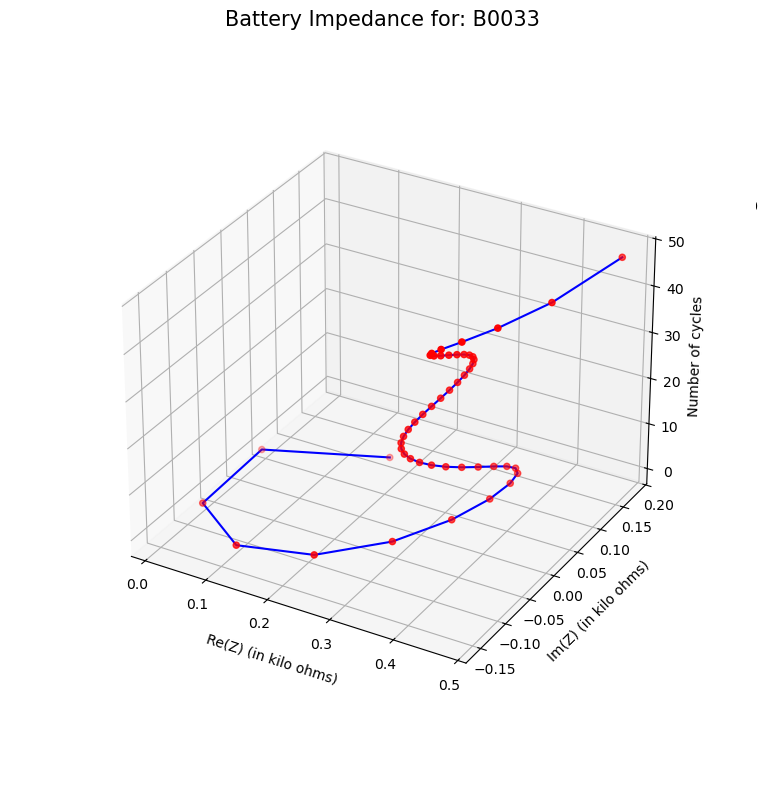

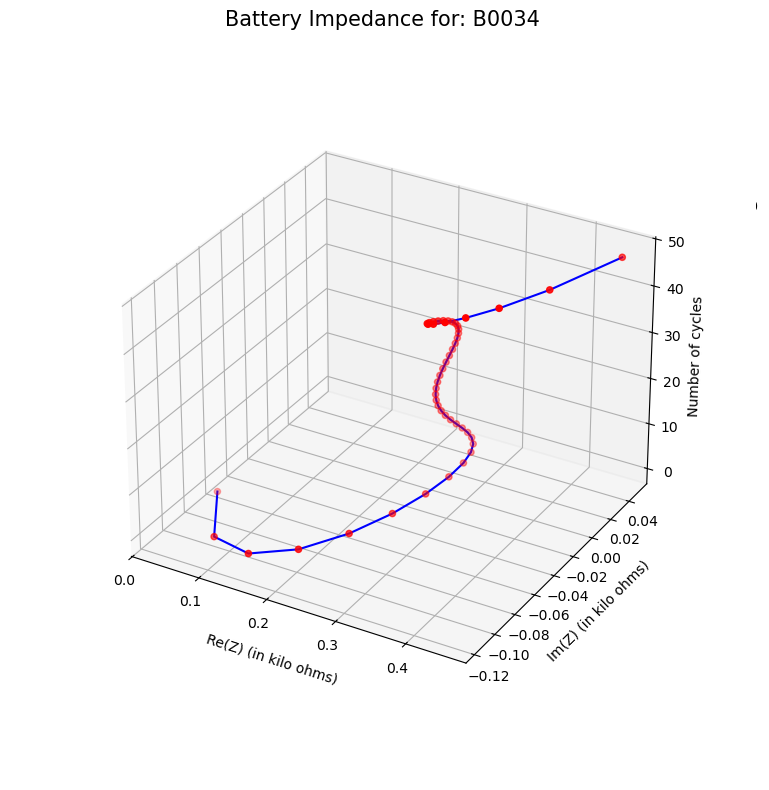

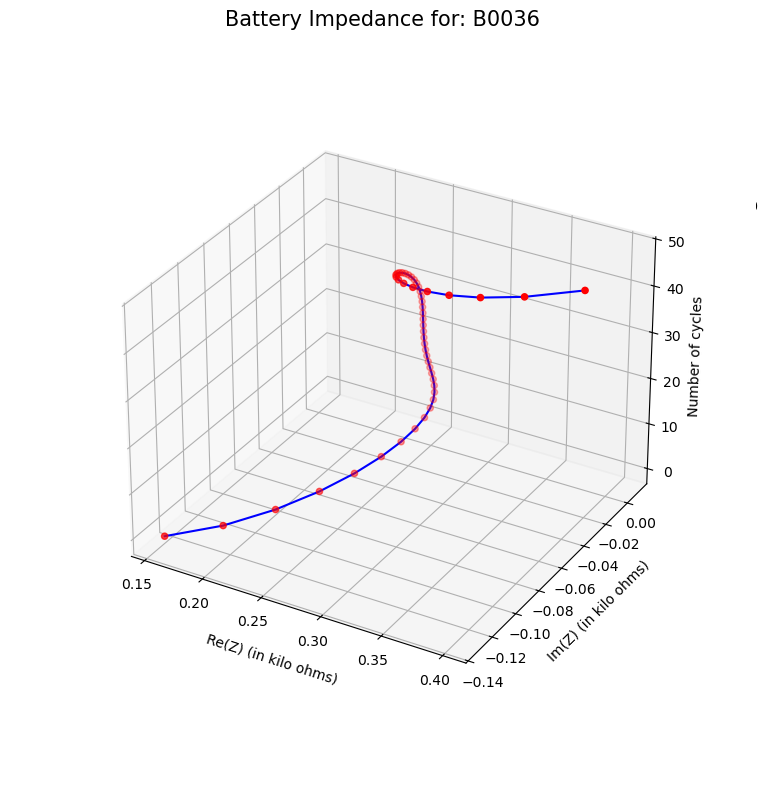

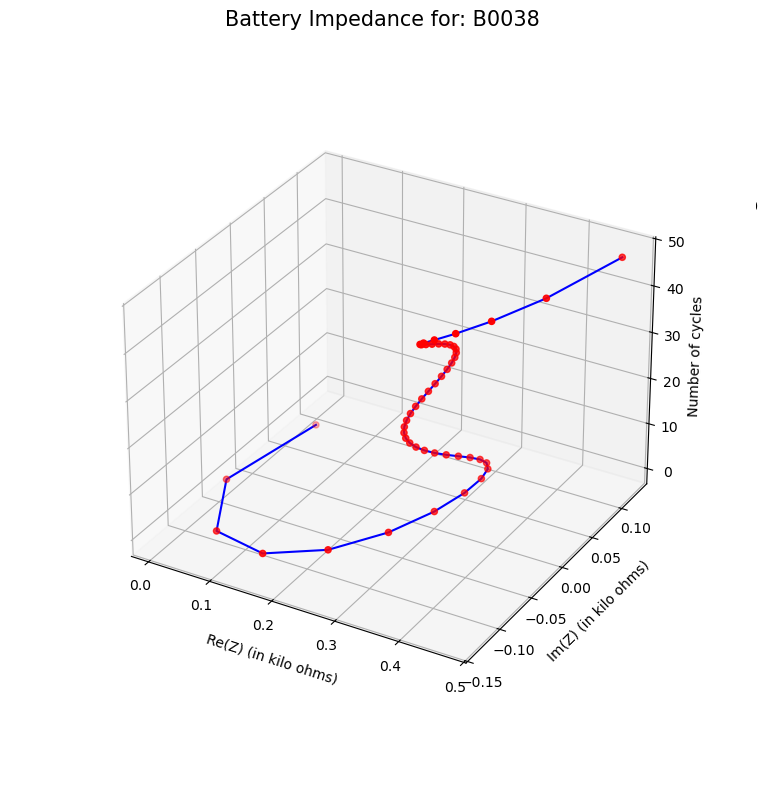

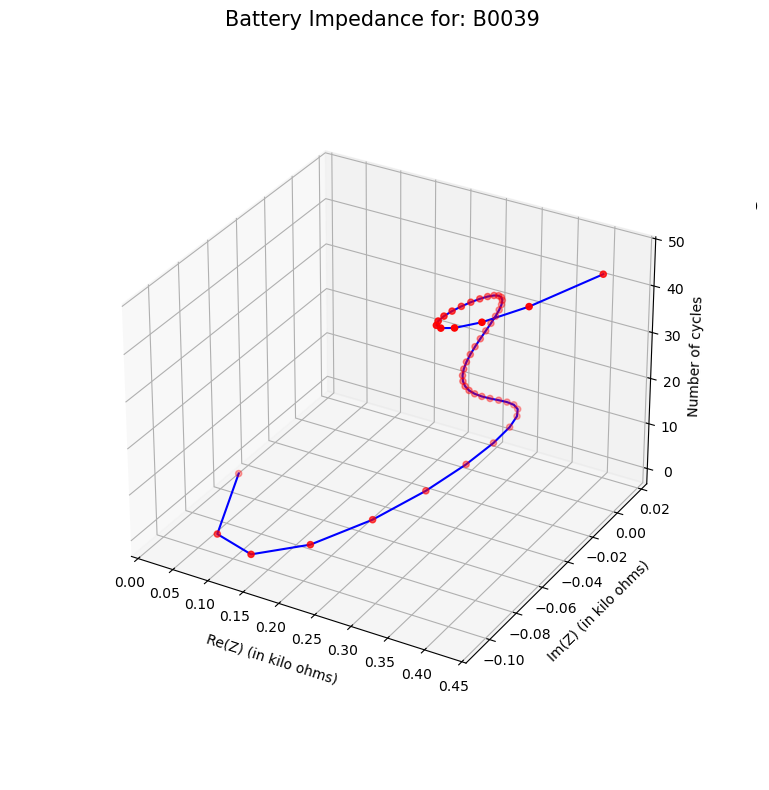

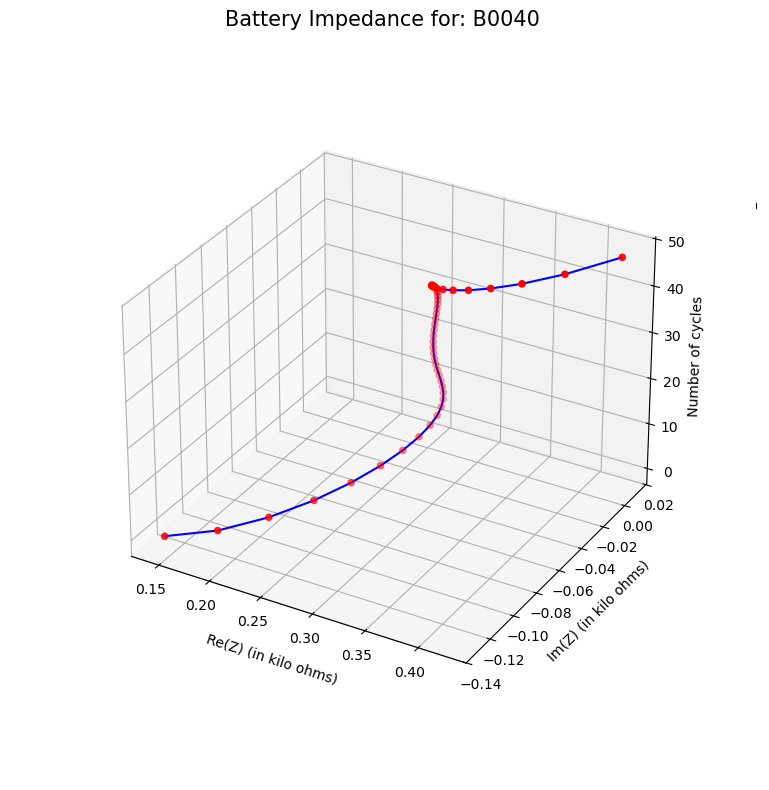

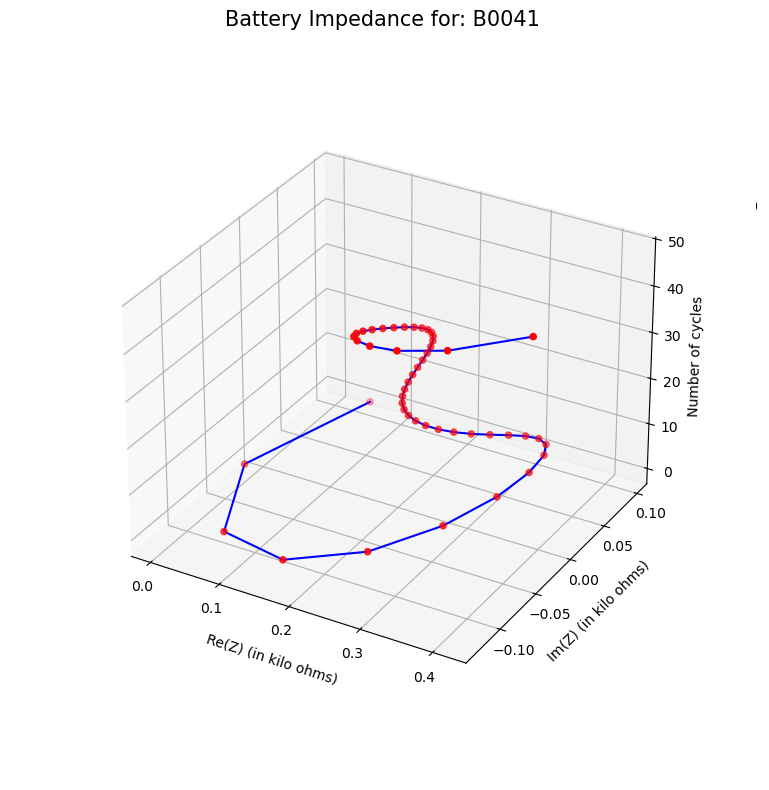

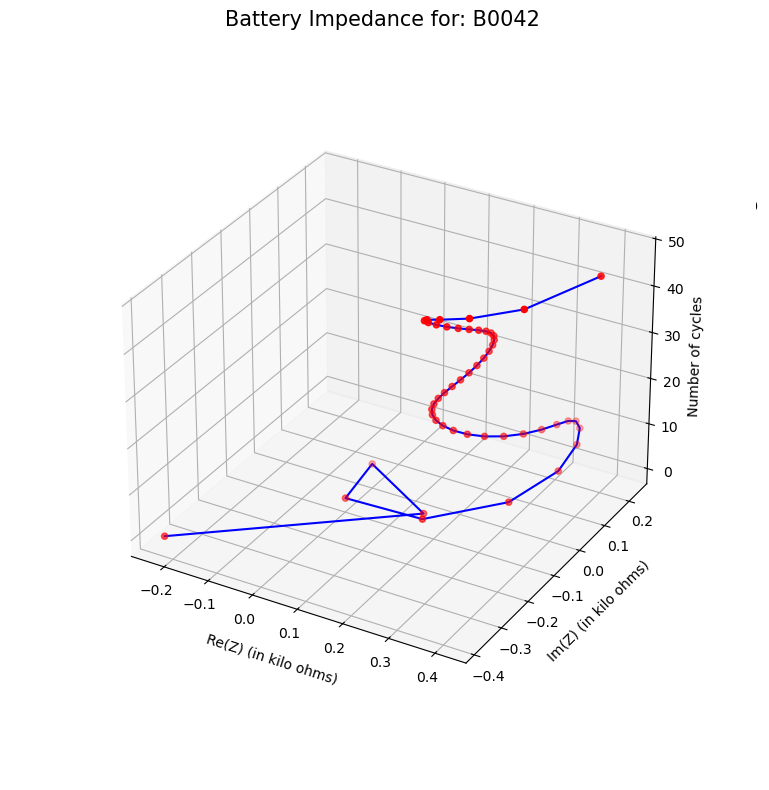

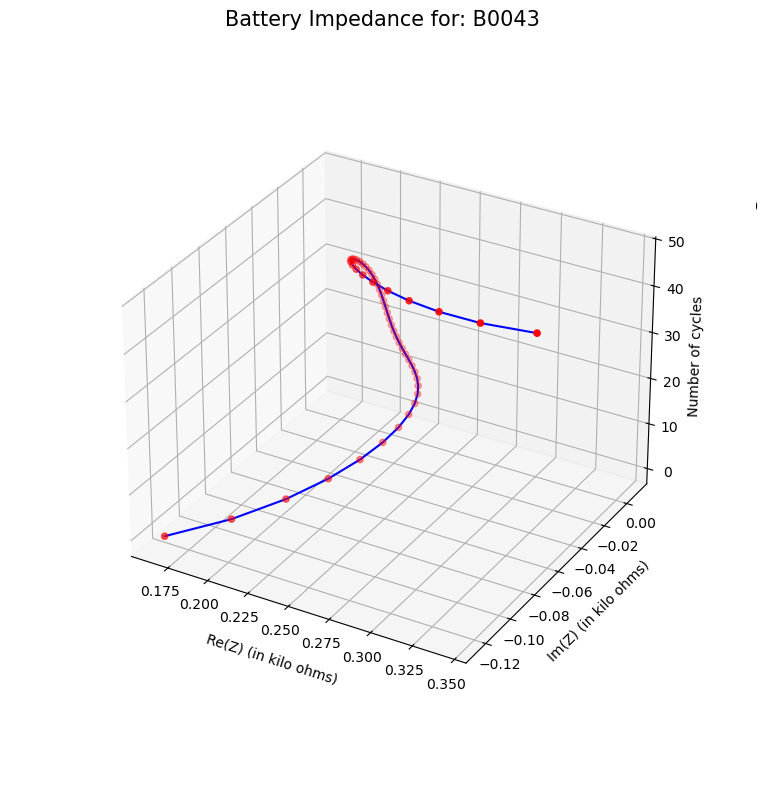

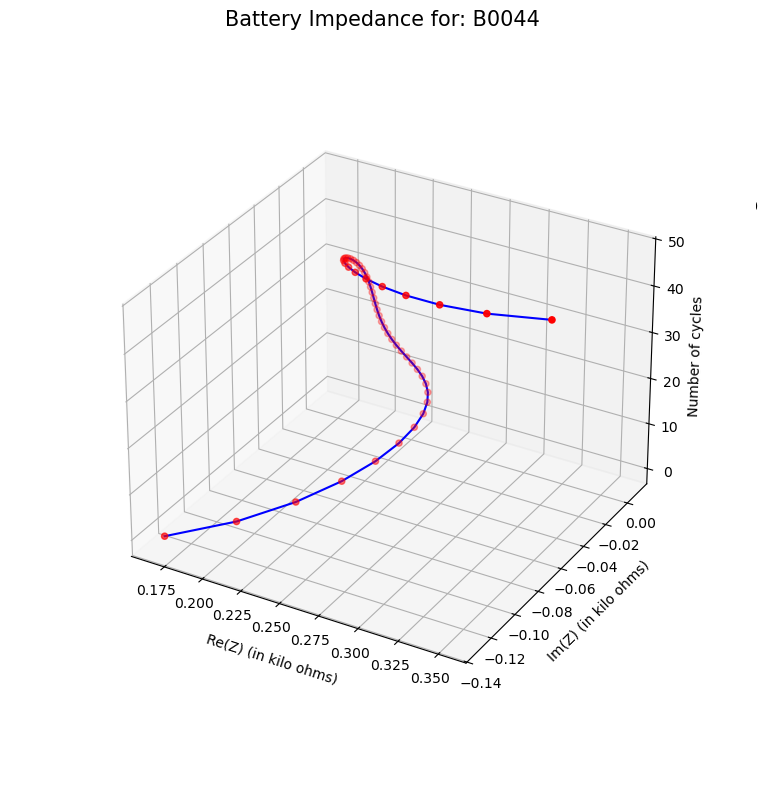

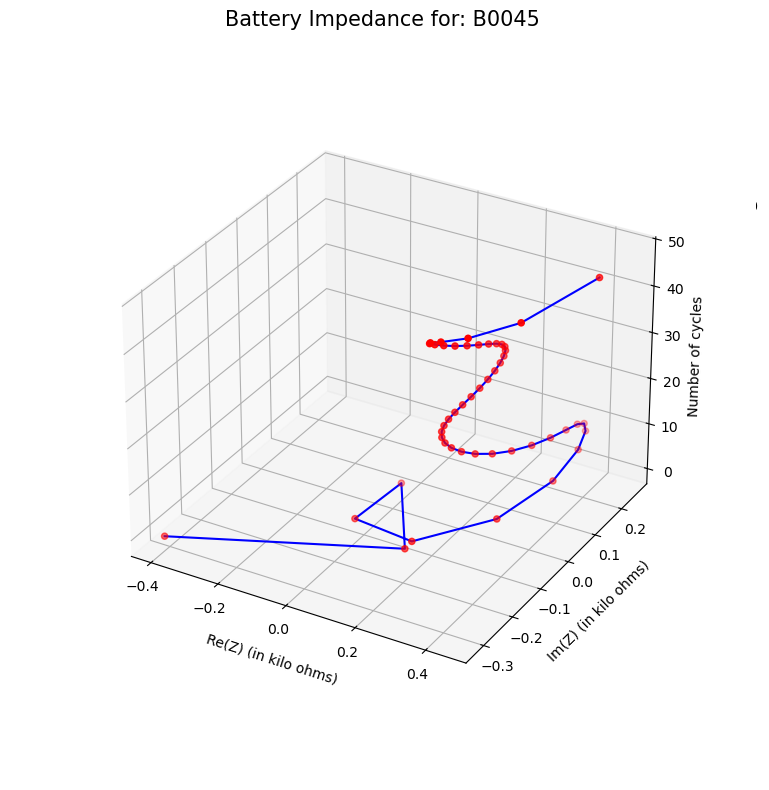

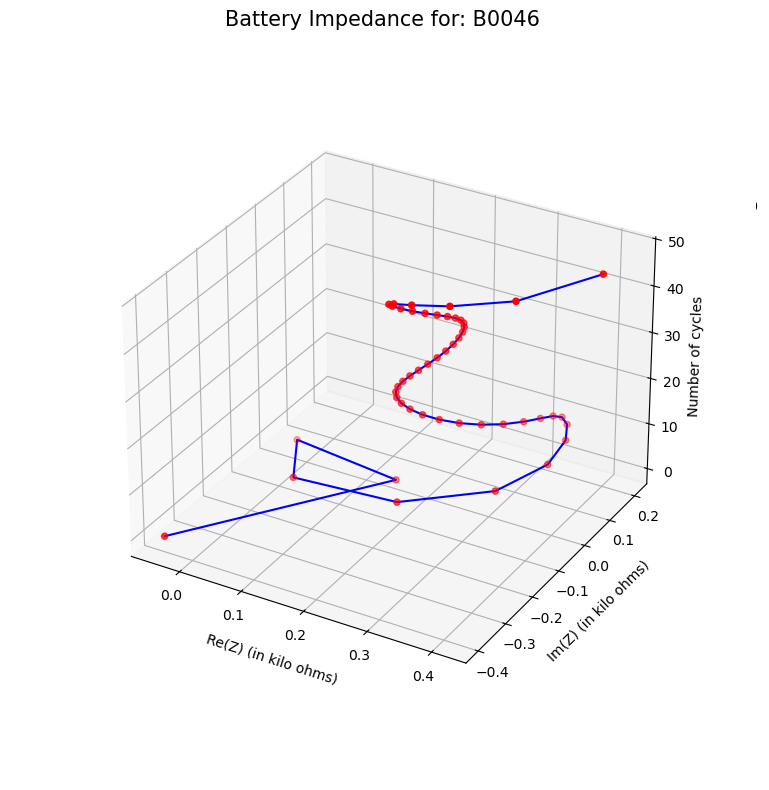

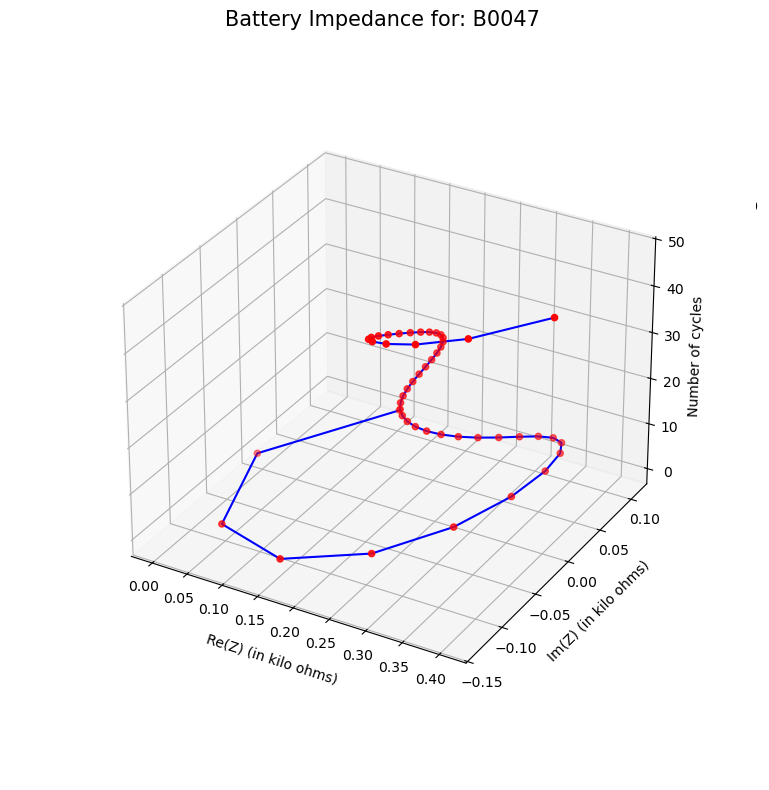

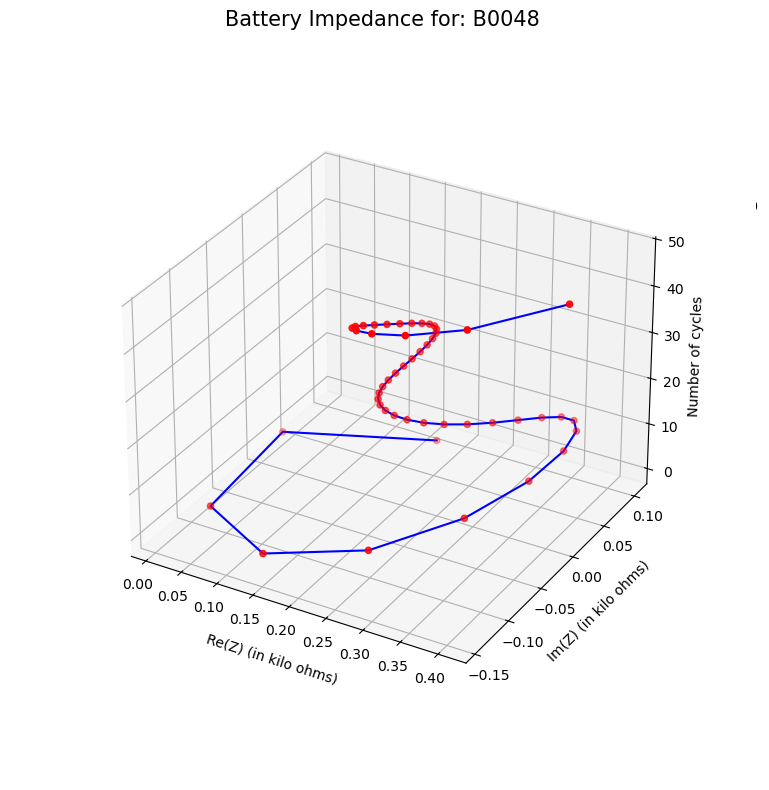

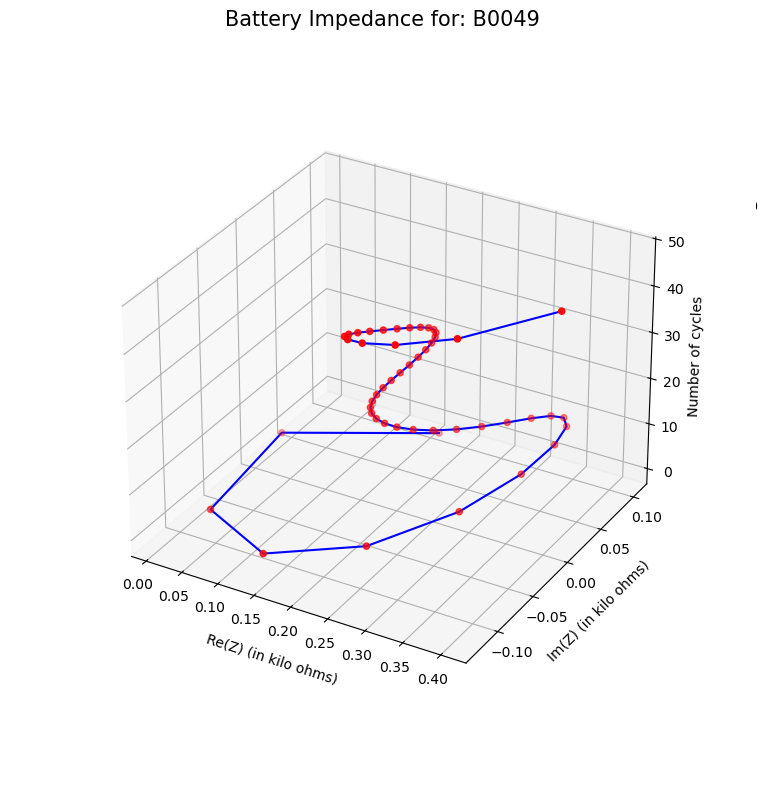

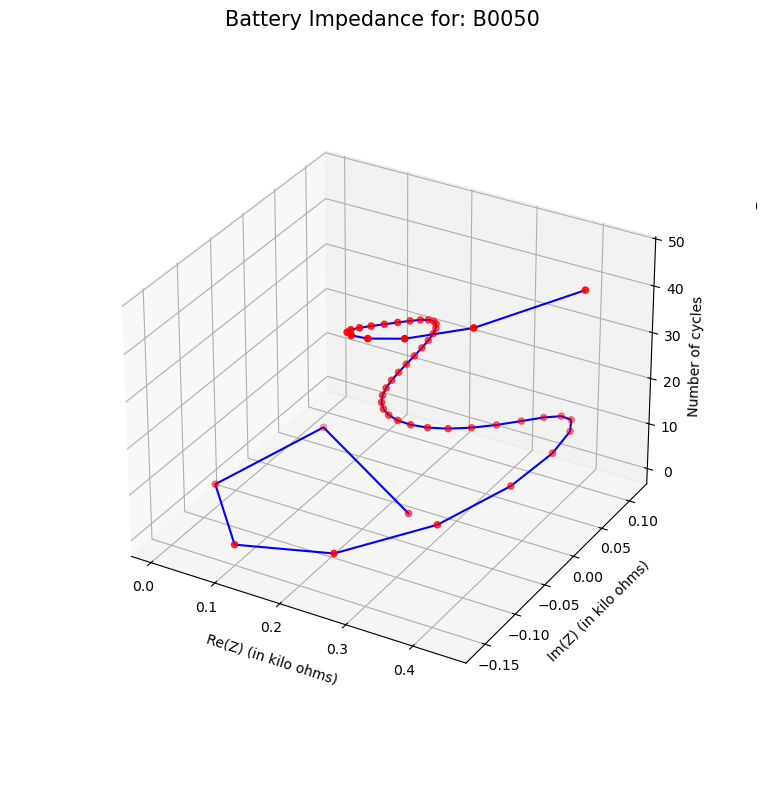

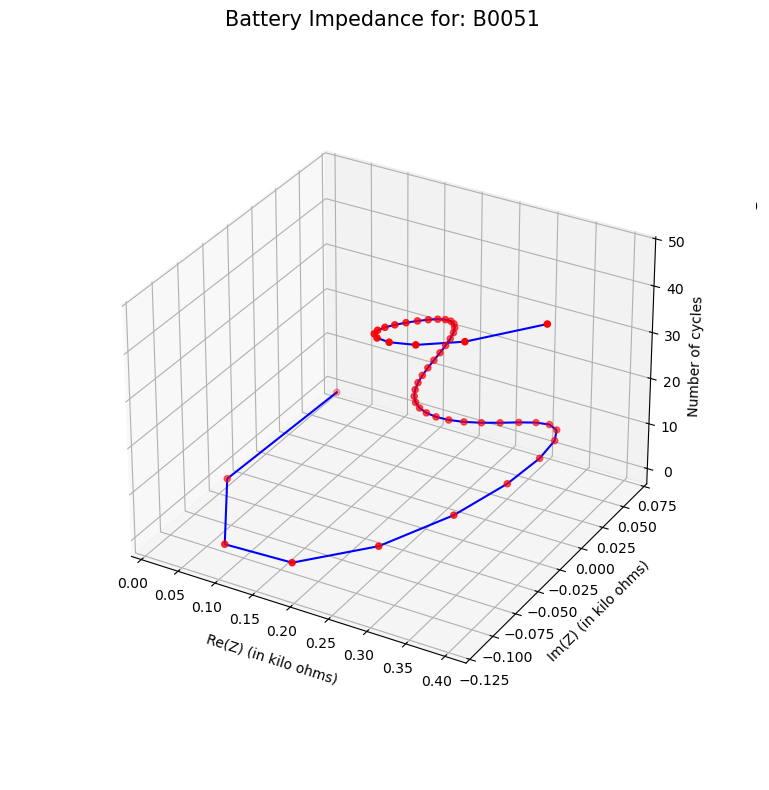

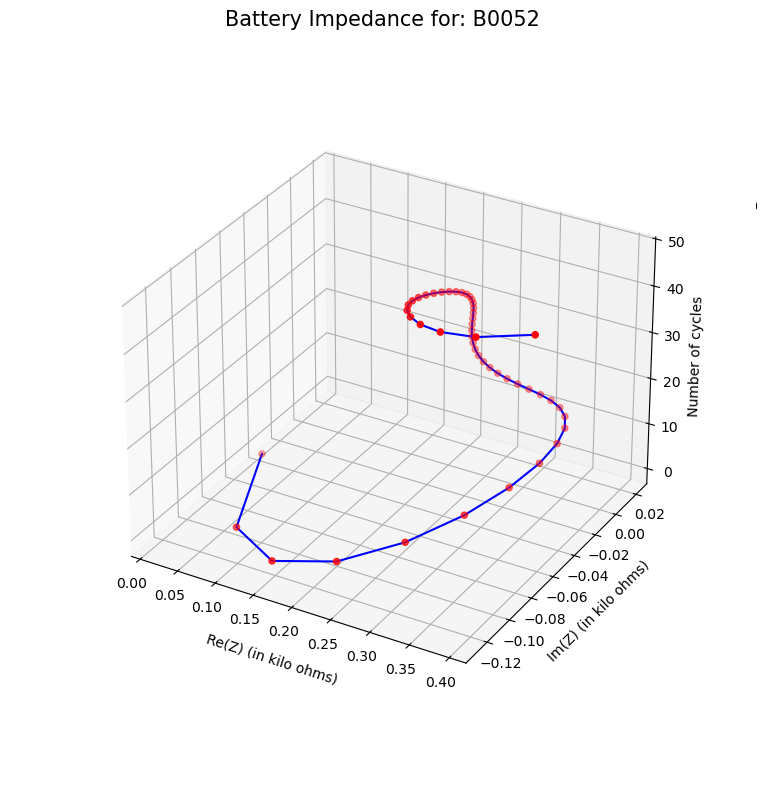

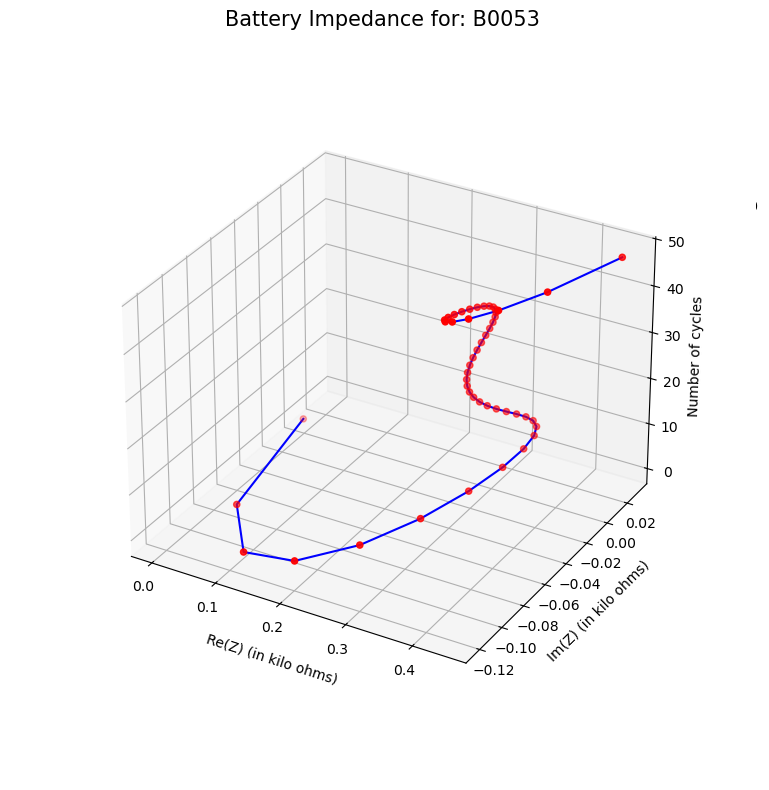

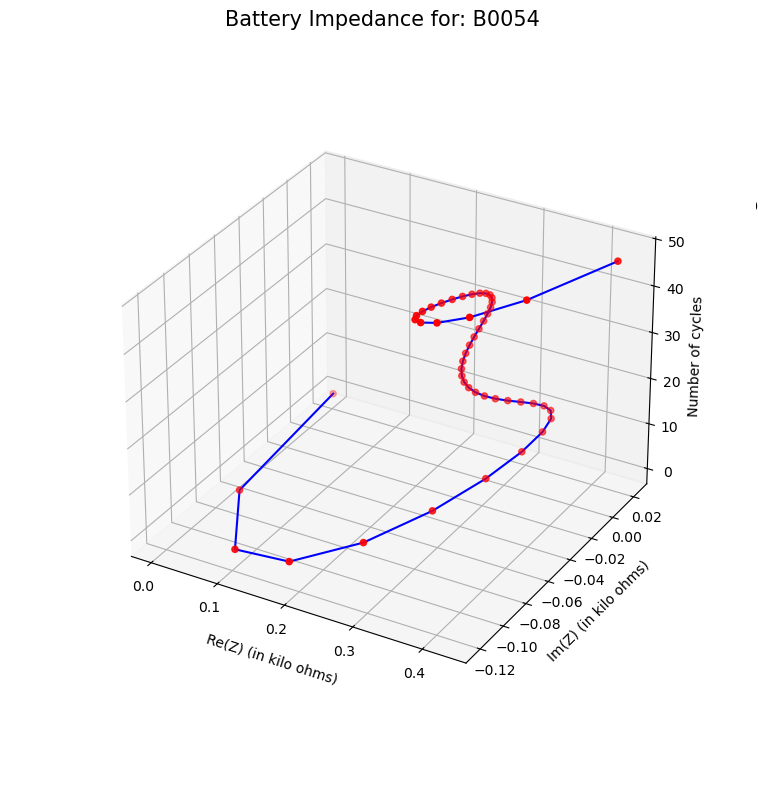

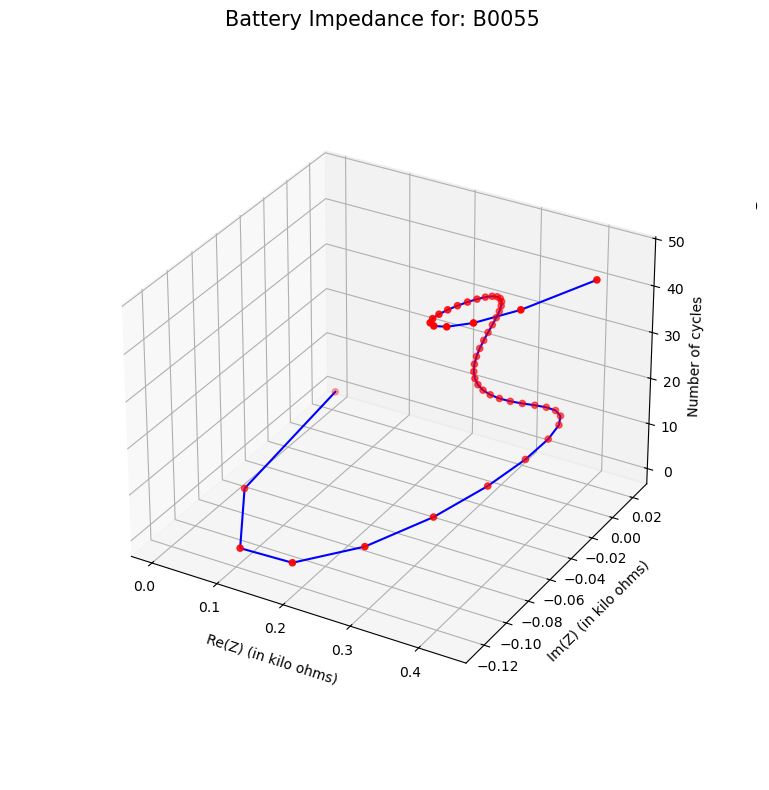

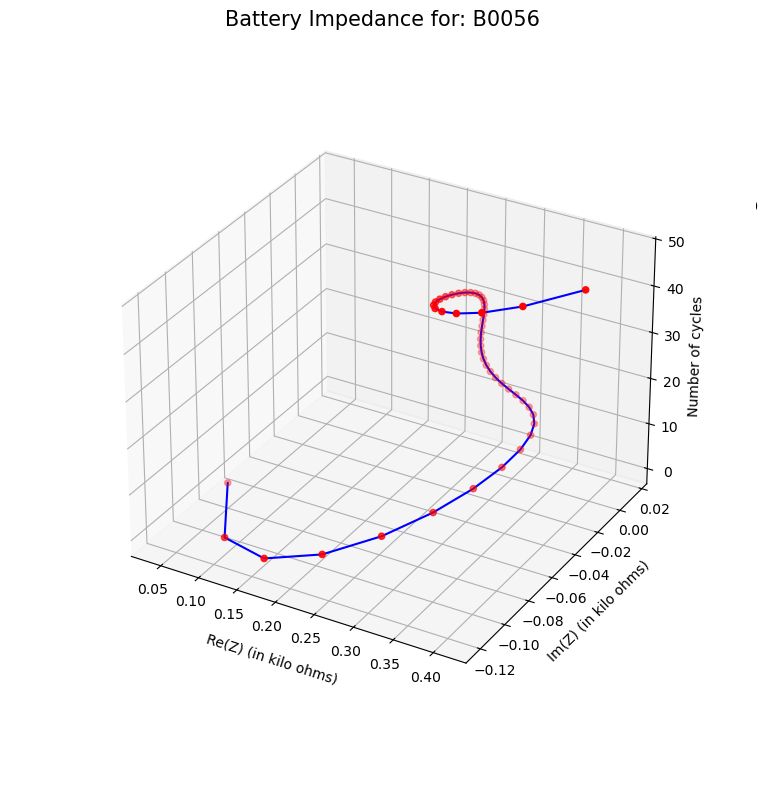

In [419]:
for bat_id, data in bat_data.items():
    fig = plt.figure(figsize=(10, 8))  # Adjust the width and height as needed
    ax = fig.add_subplot(111, projection='3d')
    
    ax = plt.axes(projection = '3d')
    x= data['real_impedance'][0]
    y= data['imag_impedance'][0]
    z = []
    for i in range(48):
        z.append(i)

    ax.set_xlabel('Re(Z) (in kilo ohms)', fontsize = 10, rotation=0, labelpad=12)
    ax.set_ylabel('Im(Z) (in kilo ohms)', fontsize = 10, rotation=0, labelpad=12)
    ax.set(zlabel=('Number of cycles'))
    #ax.tick_labels(axis='both', which='major', pad=15)
    
    plt.title(f'Battery Impedance for: {bat_id}', fontsize = 15)
    ax.plot(x, y, z, color = 'blue')
    ax.scatter(x, y, z, color = 'red')
    ax.set_box_aspect(aspect=None, zoom=0.8)
    
    plt.tight_layout()
    plt.show()

In [16]:
#######################################

# Question b) solution

In [247]:
ch_bat_data = {}
for index, row in ch_files_df.iterrows():
    bat_id = row['battery_id']
    file = row['filename']
    start_time = row['start_time']
    file_path = f"data/{file}"
    data = pd.read_csv(file_path)
    
    voltage = data['Voltage_measured'].tolist()
    cur_char = data['Current_charge'].tolist()
    vol_char = data['Voltage_charge'].tolist()
    dQdV = []
    for i in range(len(voltage)):
        if i < len(voltage)-1:
            dq = cur_char[i+1]-cur_char[i]
            dv = vol_char[i+1]-vol_char[i]
            if dv == 0:
                dv =0.1
                dQdV.append(dq/dv)
            else:
                dQdV.append(dq/dv)
    
    ch_bat_data[bat_id] = {'start_time' : [], 'Voltage': [], 'dQ/dV': []}
    for i in range(len(dQdV)):
        if dQdV[i]>=0:
            ch_bat_data[bat_id]['start_time'].append(start_time)
            ch_bat_data[bat_id]['Voltage'].append(voltage[i])
            ch_bat_data[bat_id]['dQ/dV'].append(dQdV[i])

In [266]:
'''for bat_id, data in ch_bat_data.items():

    x= data['Voltage']
    y= data['dQ/dV']
    plt.xlabel('Voltage', fontsize = 8)
    plt.ylabel('dQ/dV', fontsize = 8)
    plt.title(f'Charge for: {bat_id}')
    plt.plot(x, y, color = 'green')
    plt.show()'''

"for bat_id, data in ch_bat_data.items():\n\n    x= data['Voltage']\n    y= data['dQ/dV']\n    plt.xlabel('Voltage', fontsize = 8)\n    plt.ylabel('dQ/dV', fontsize = 8)\n    plt.title(f'Charge for: {bat_id}')\n    plt.plot(x, y, color = 'green')\n    plt.show()"

In [253]:
dch_bat_data = {}
for index, row in dch_files_df.iterrows():
    bat_id = row['battery_id']
    file = row['filename']
    start_time = row['start_time']
    file_path = f"data/{file}"
    data = pd.read_csv(file_path)
    voltage = data['Voltage_measured'].tolist()
    cur_load = data['Current_load'].tolist()
    vol_load = data['Voltage_load'].tolist()
    dQdV = []
    for i in range(len(voltage)):
        if i < len(voltage)-1 and vol_load[i]!=0:
            dq = cur_load[i+1]-cur_load[i]
            dv = vol_load[i+1]-vol_load[i]
            if dv == 0:
                dv =0.1
                dQdV.append(dq/dv)
            else:
                dQdV.append(dq/dv)
    
    dch_bat_data[bat_id] = {'start_time' : [], 'Voltage': [], 'dQ/dV': []}
    for i in range(len(dQdV)):
        if dQdV[i]<=0:
            dch_bat_data[bat_id]['start_time'].append(start_time)
            dch_bat_data[bat_id]['Voltage'].append(voltage[i])
            dch_bat_data[bat_id]['dQ/dV'].append(dQdV[i])
        else:
            continue

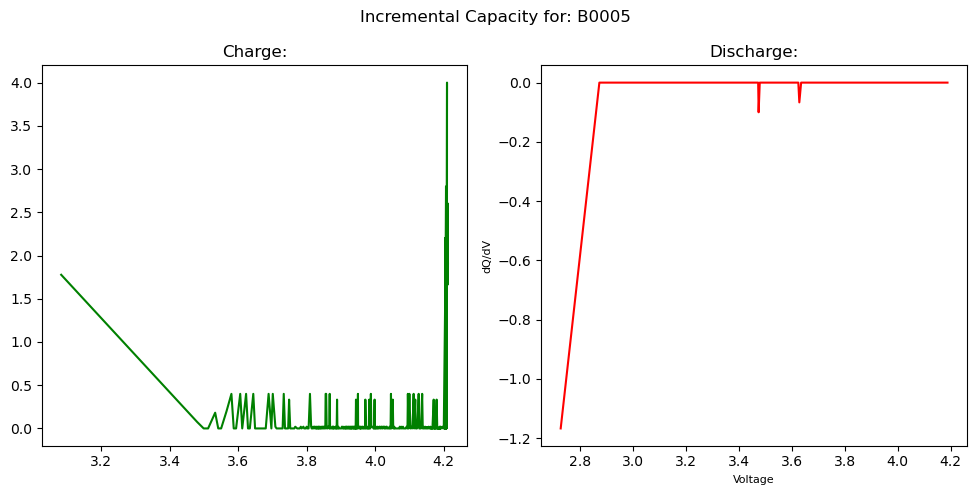

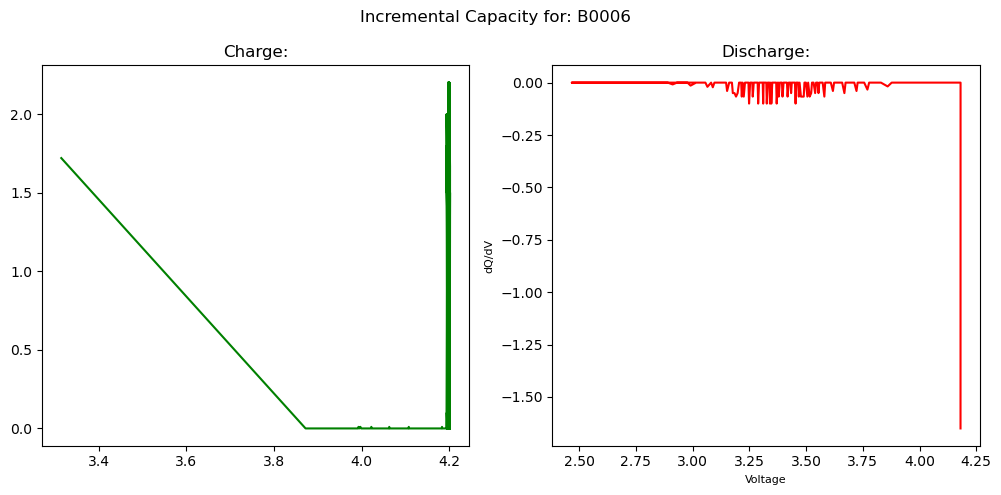

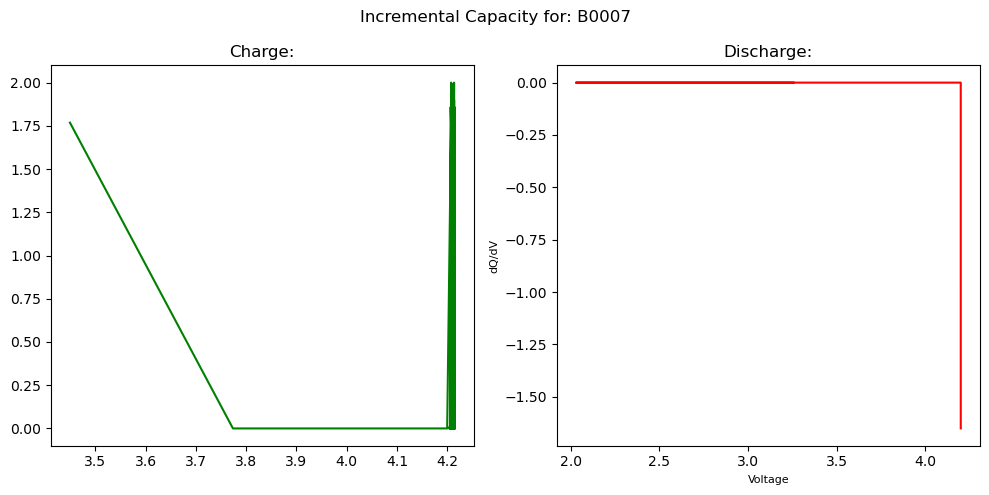

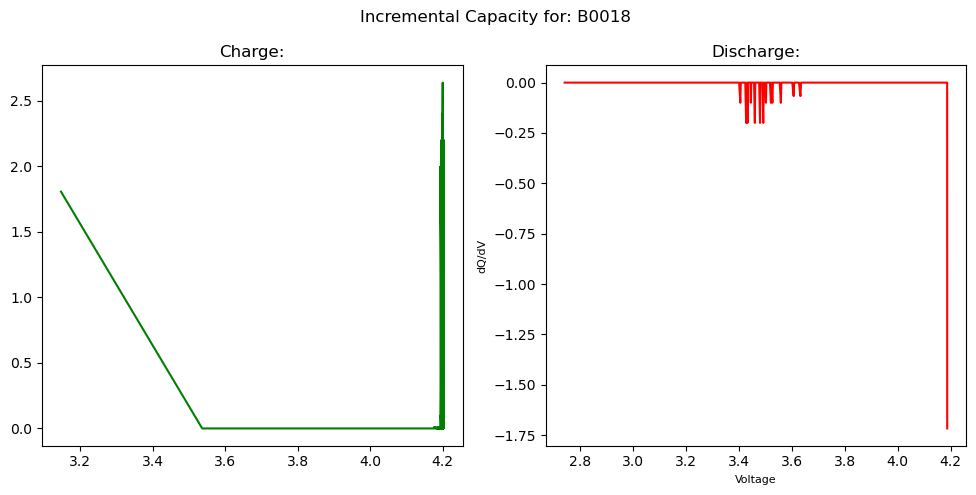

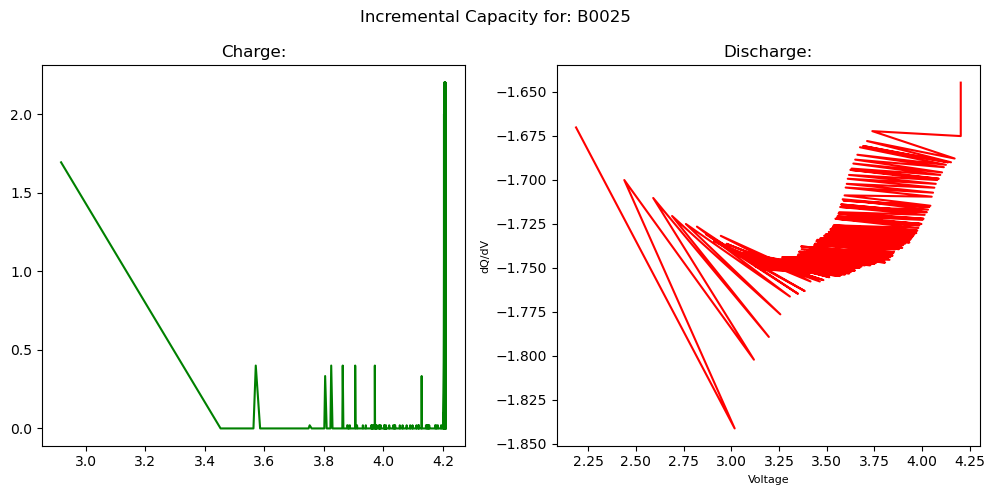

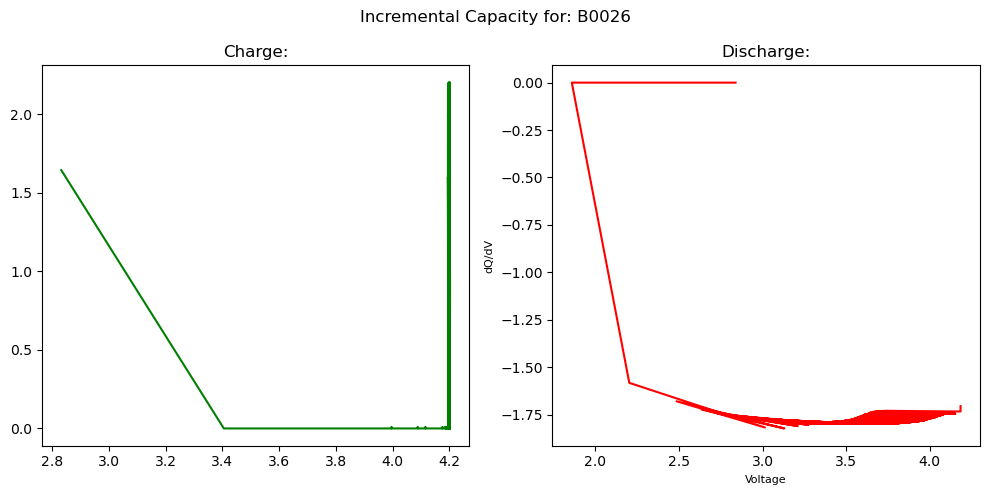

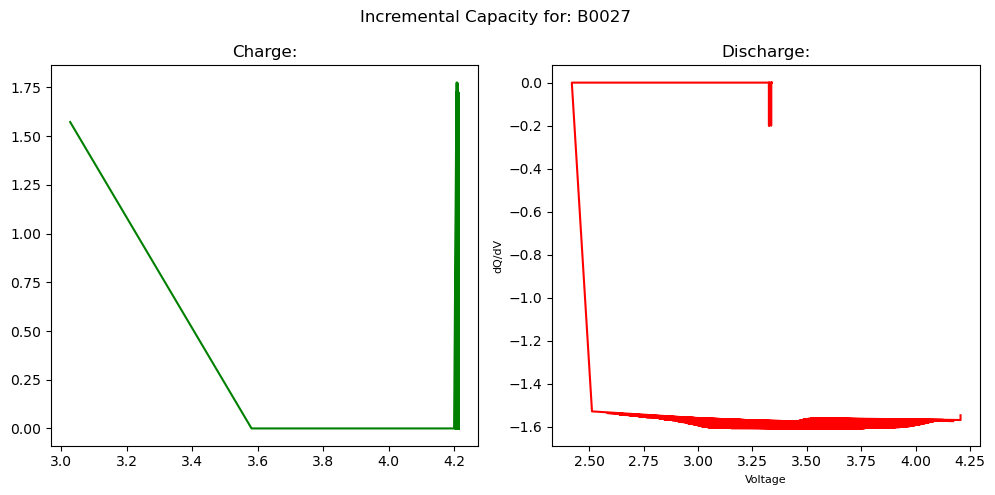

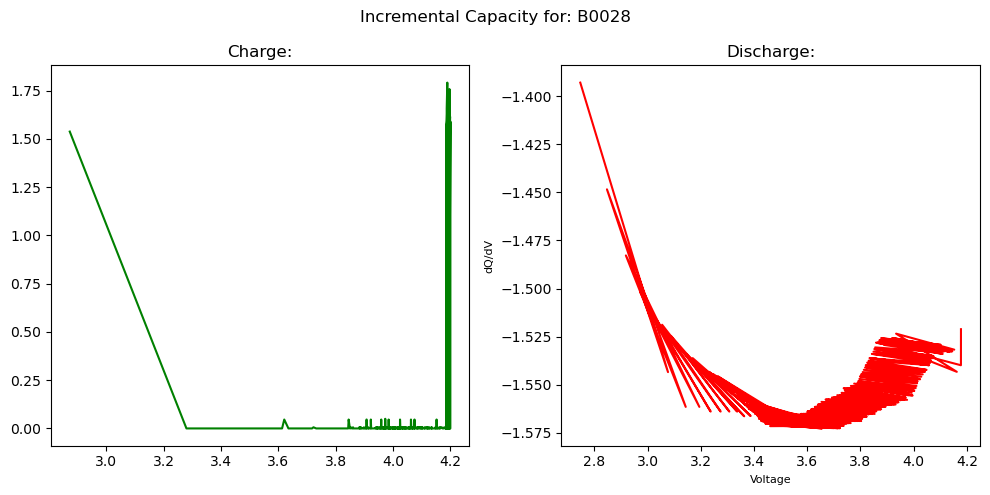

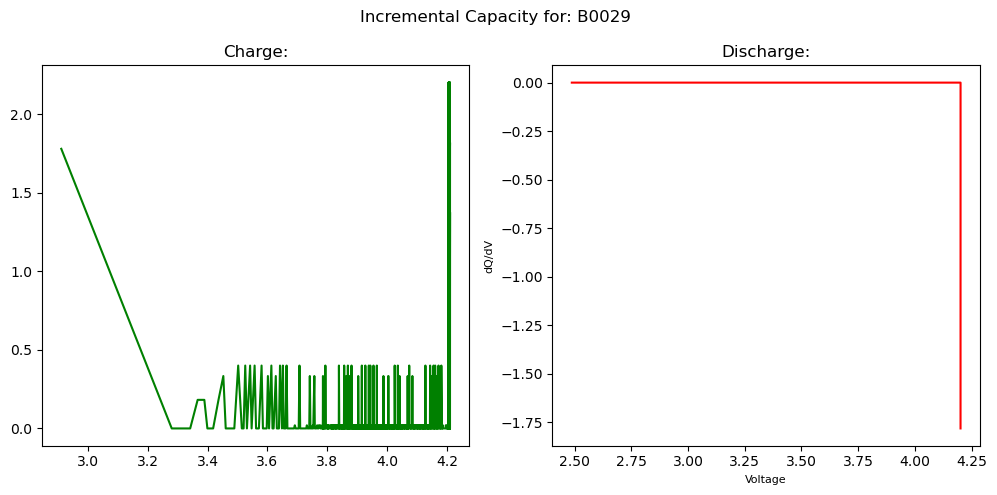

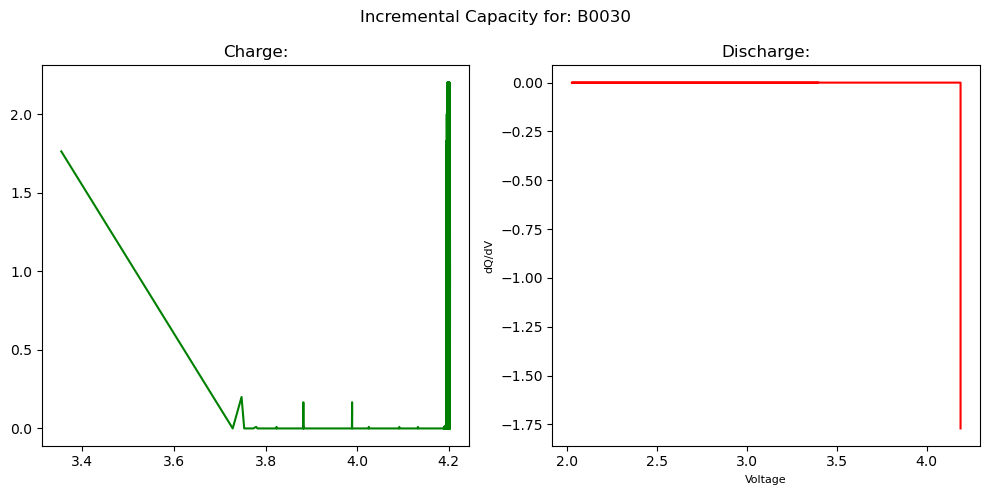

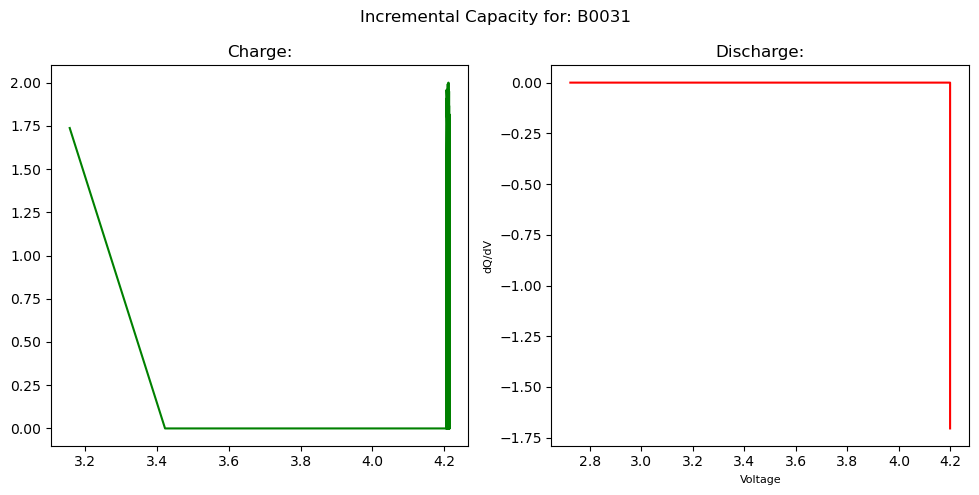

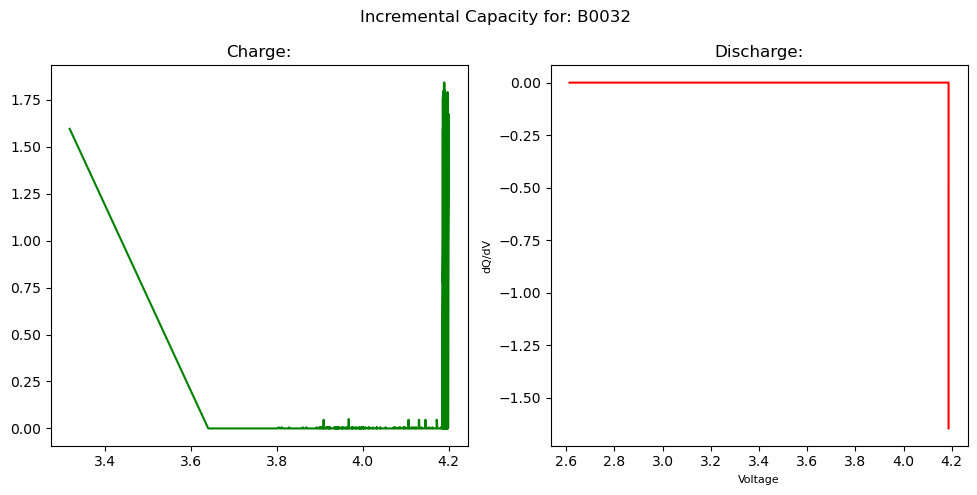

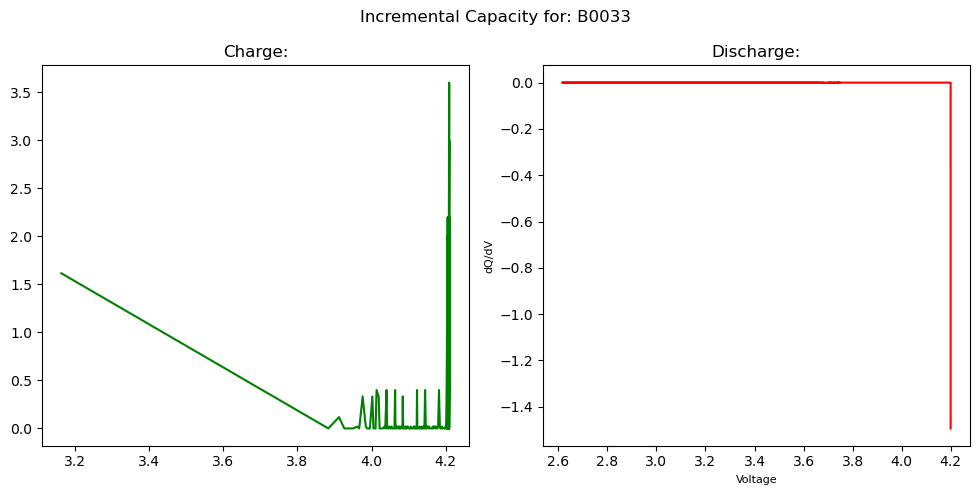

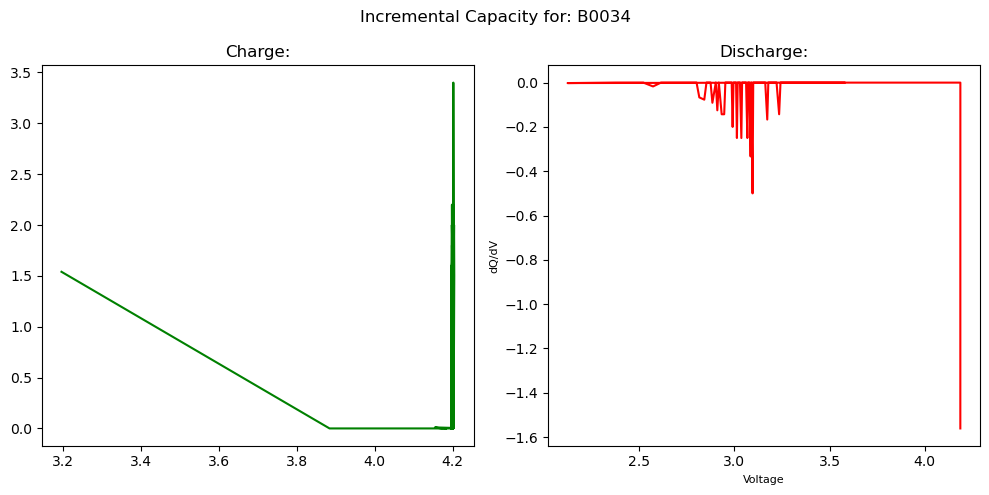

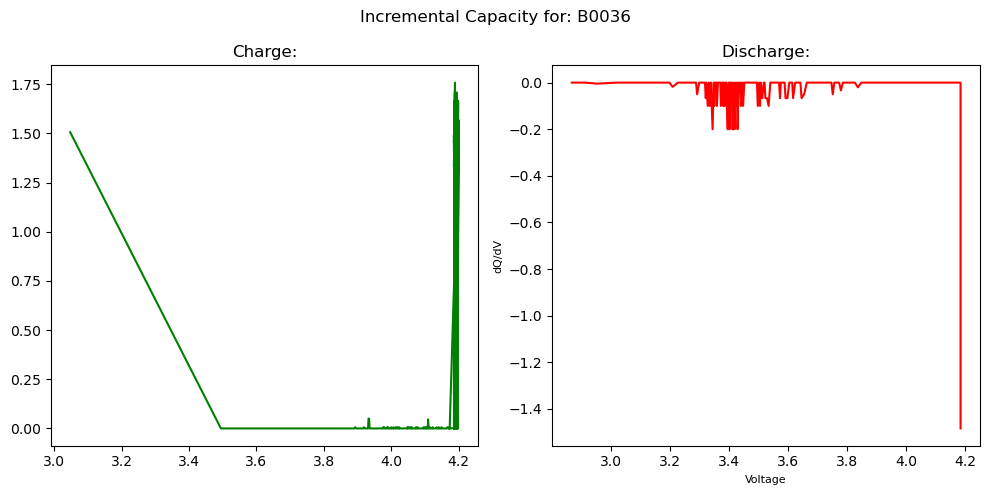

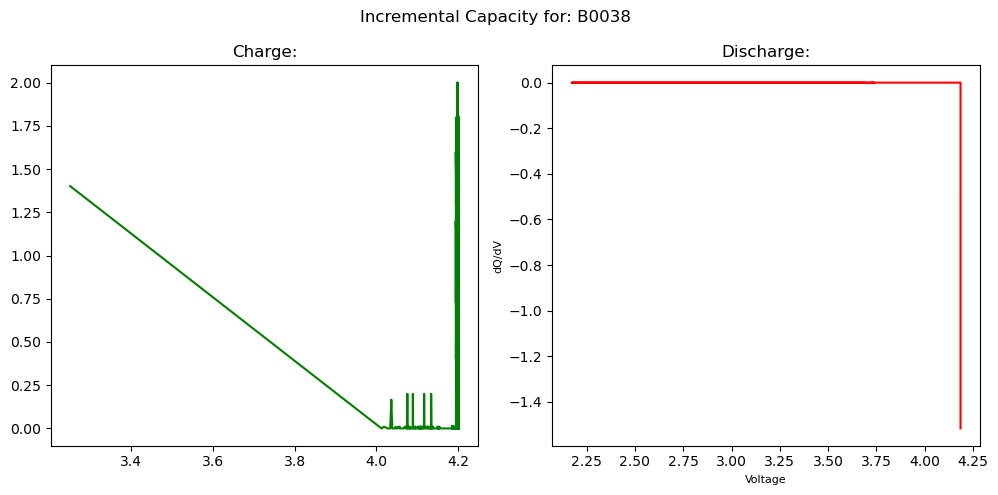

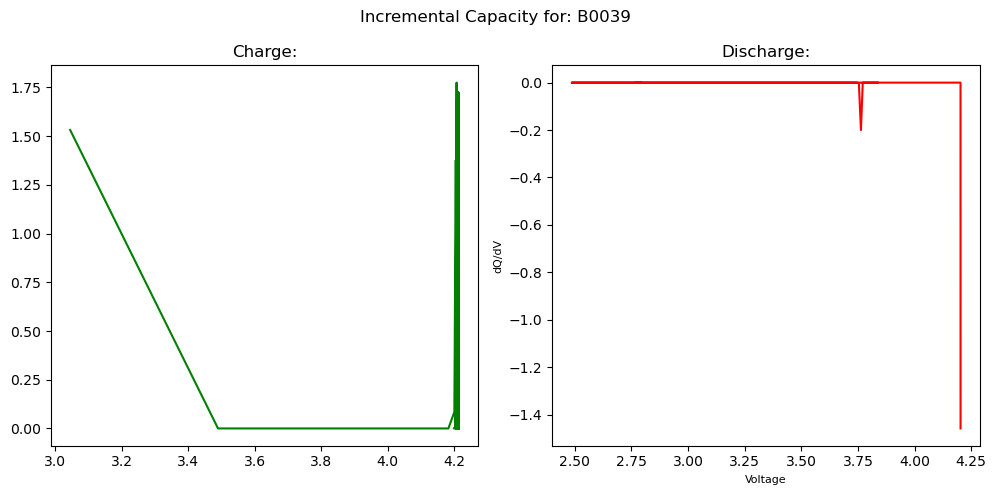

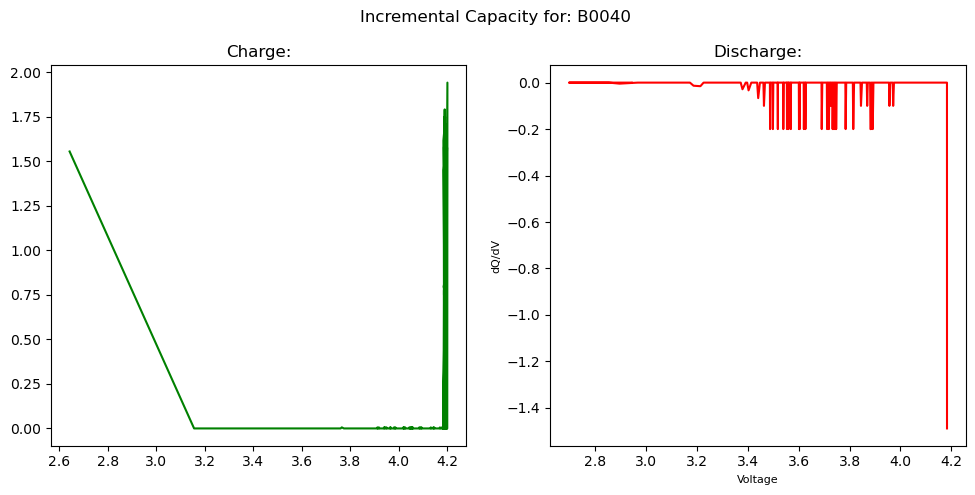

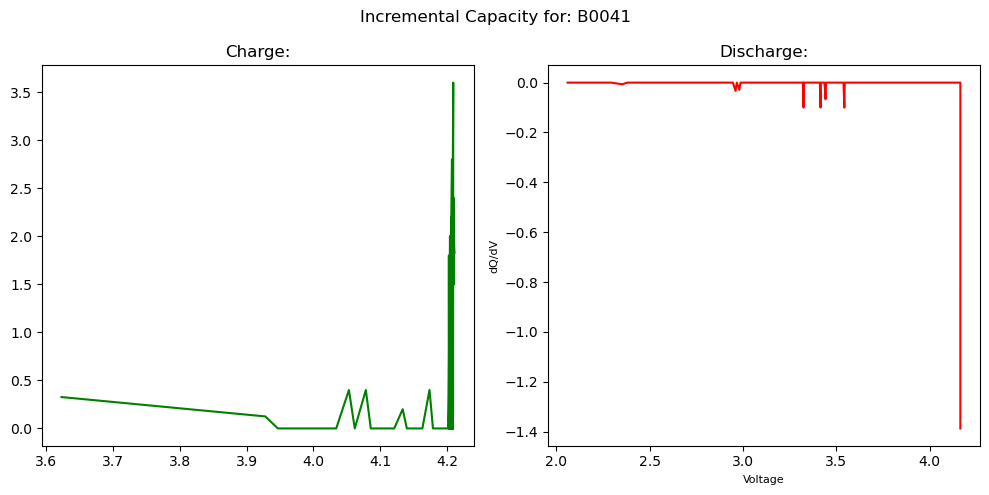

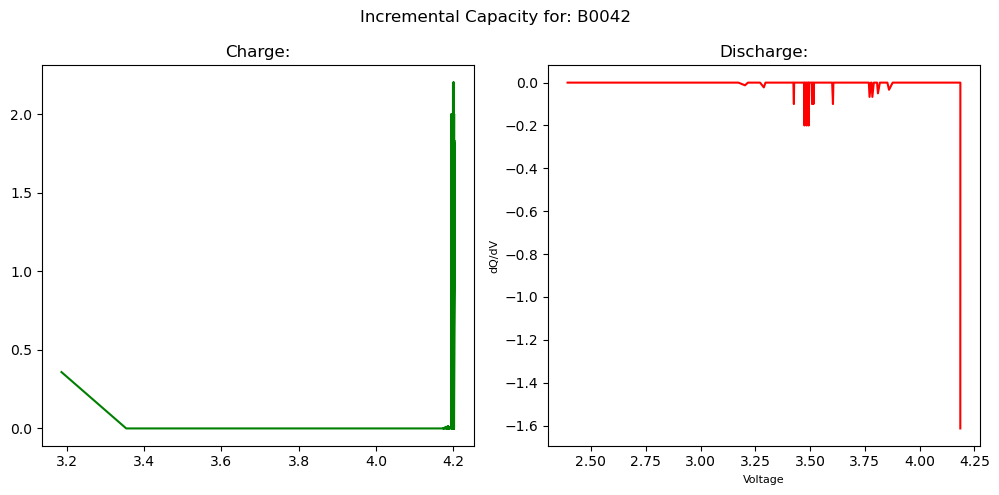

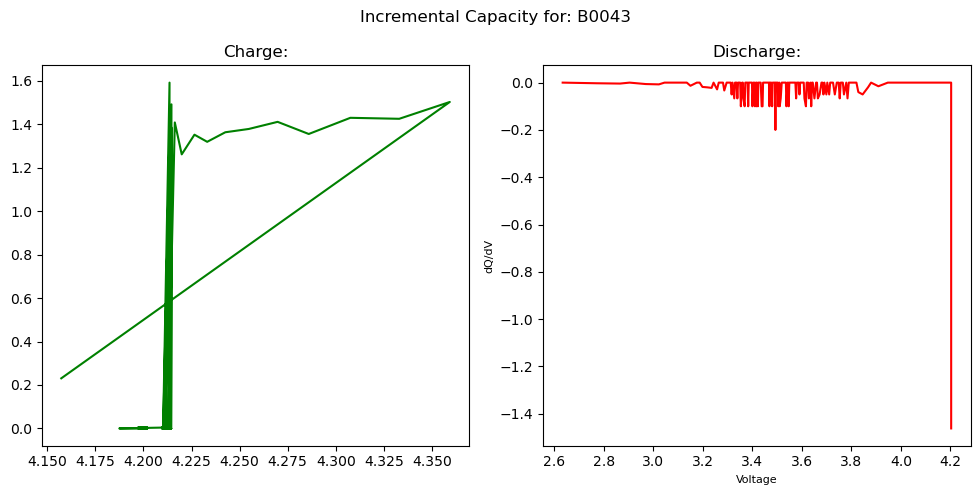

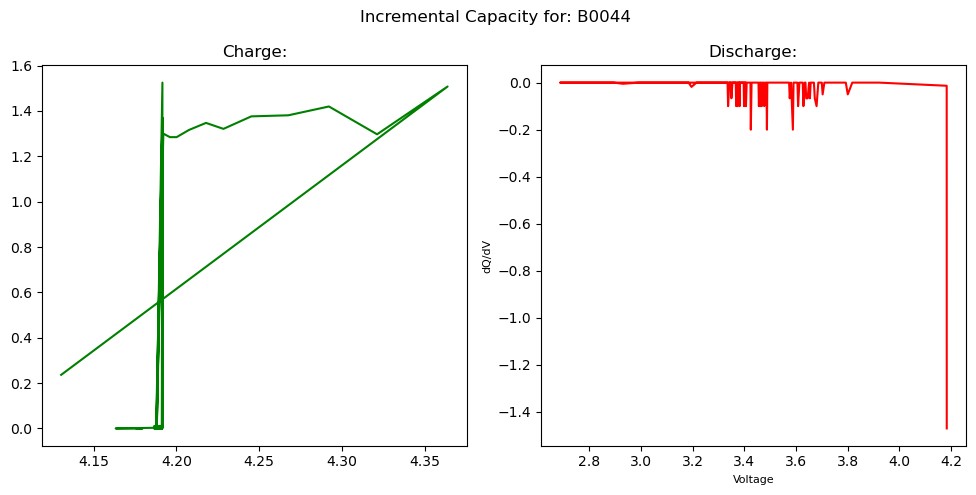

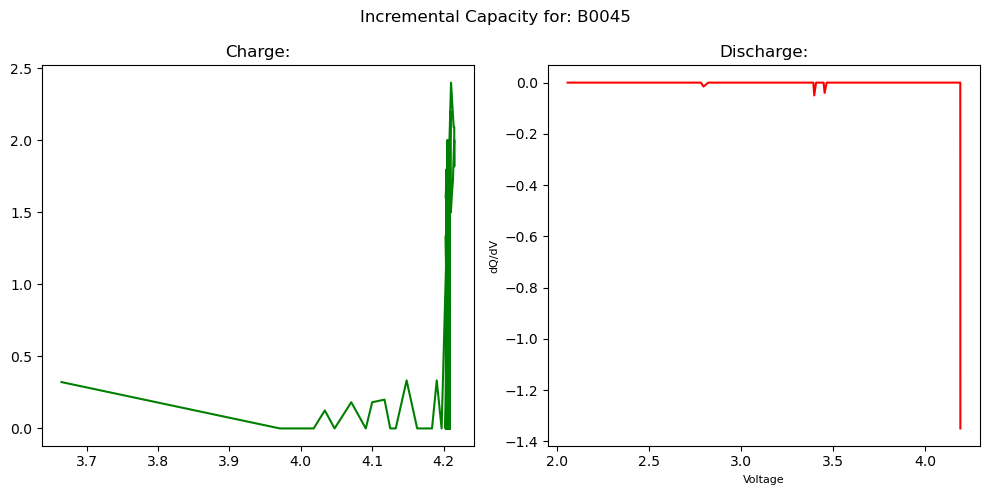

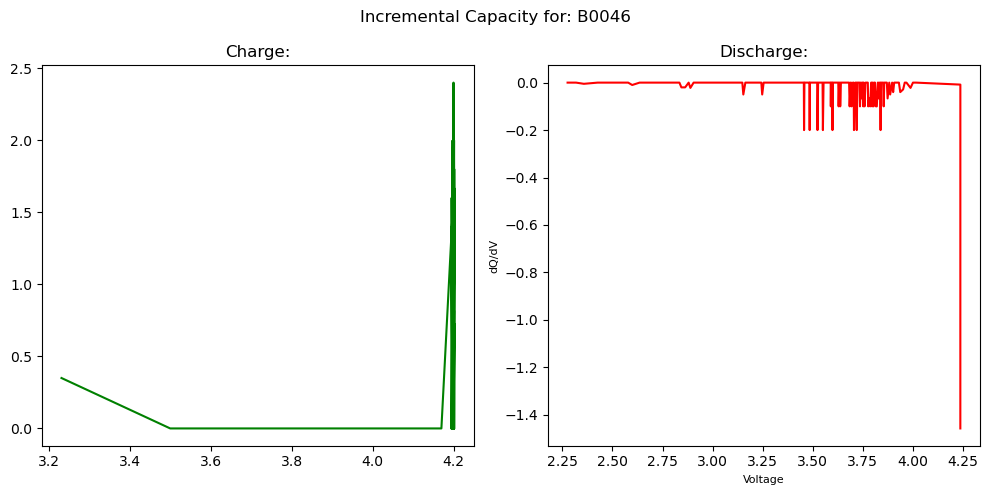

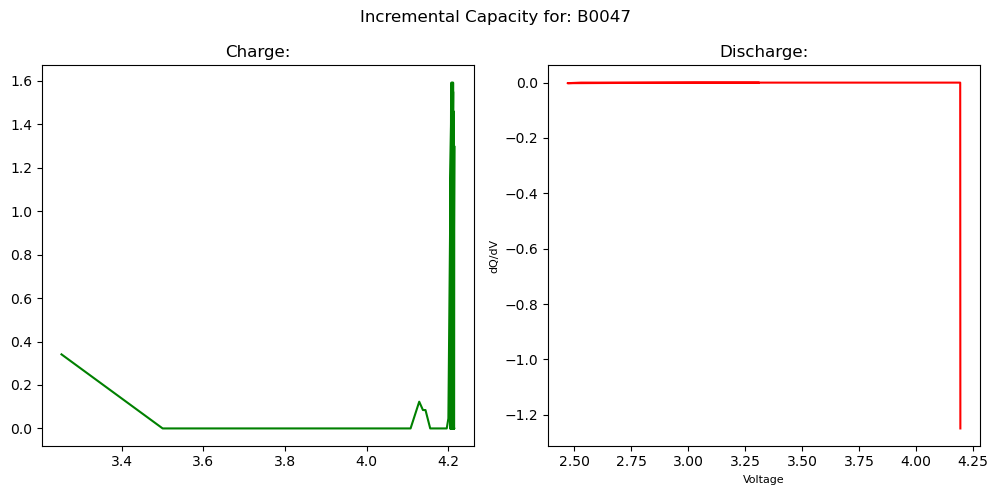

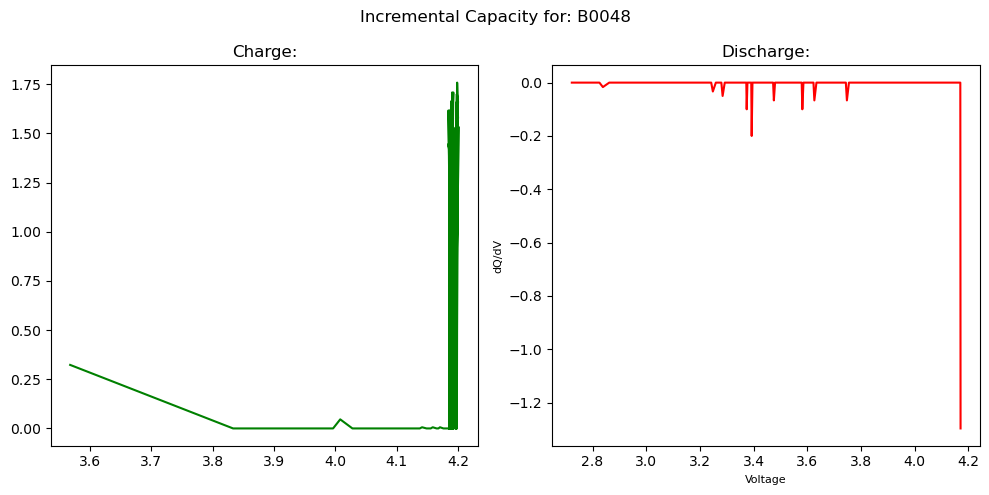

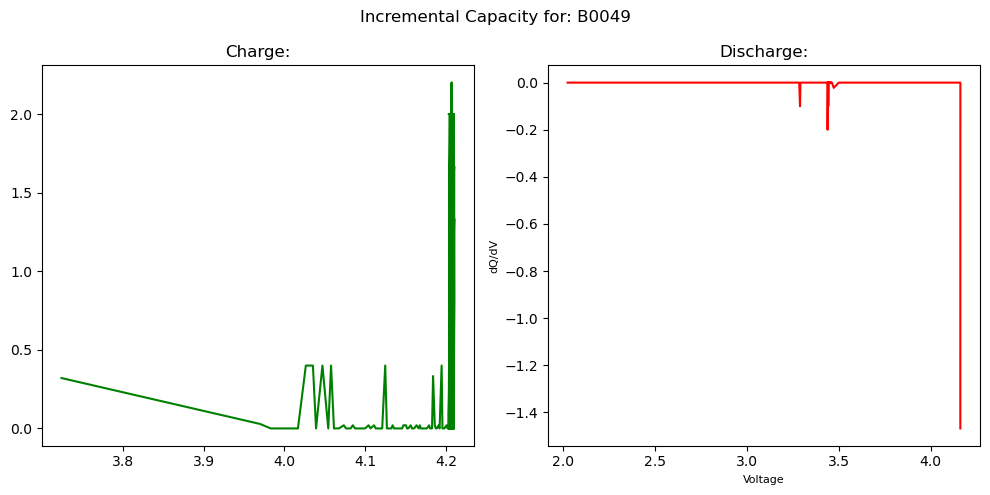

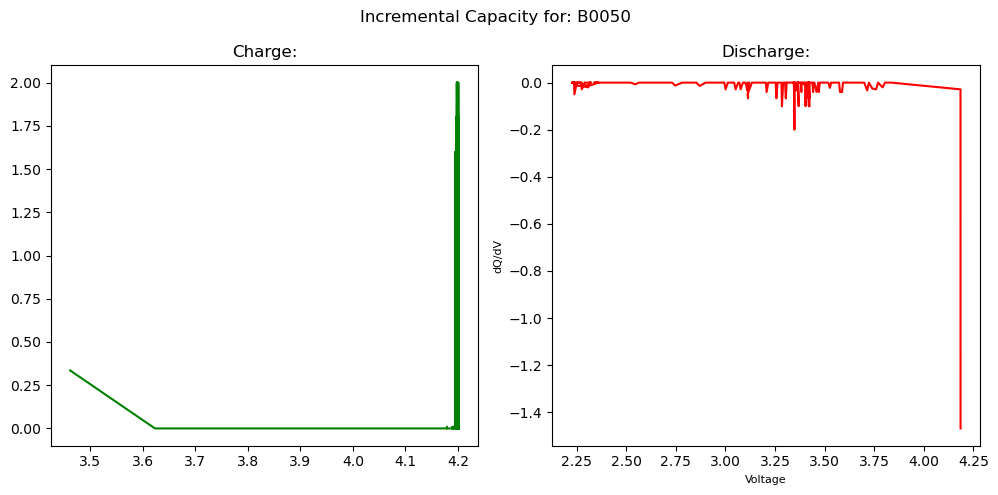

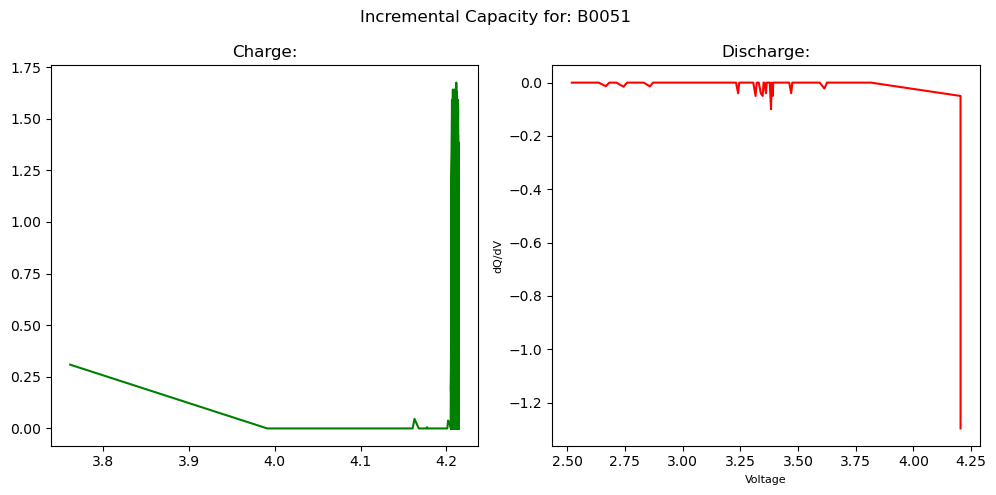

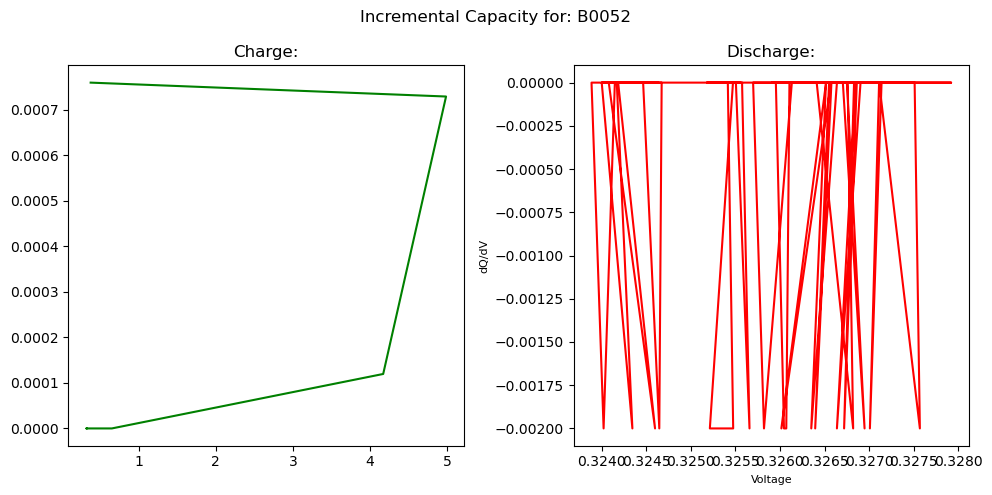

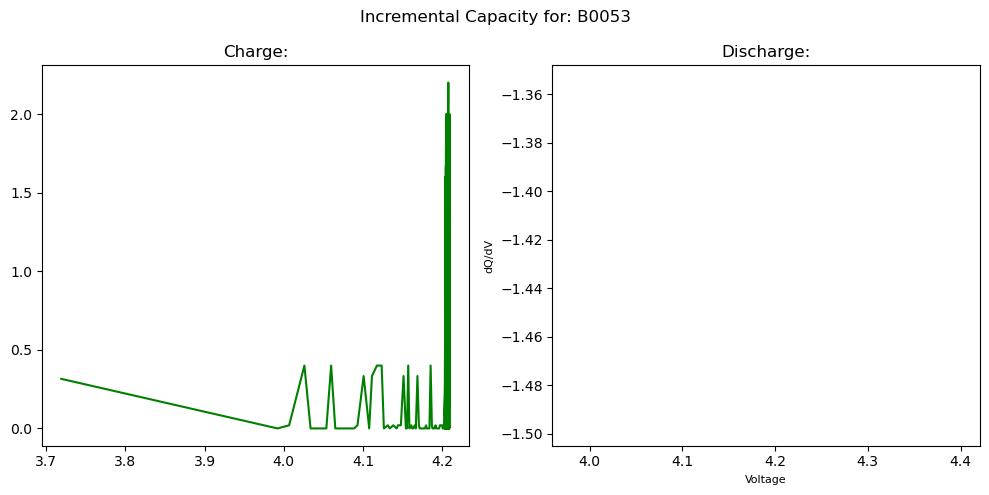

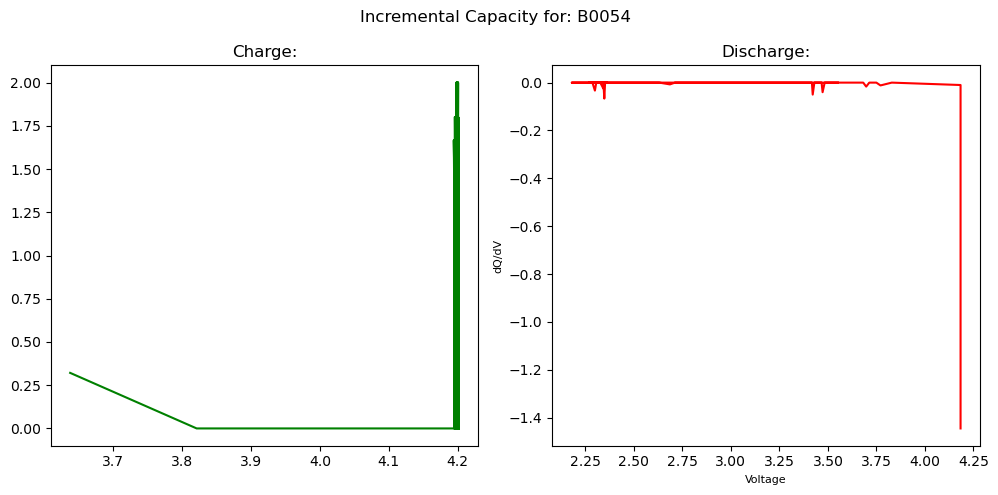

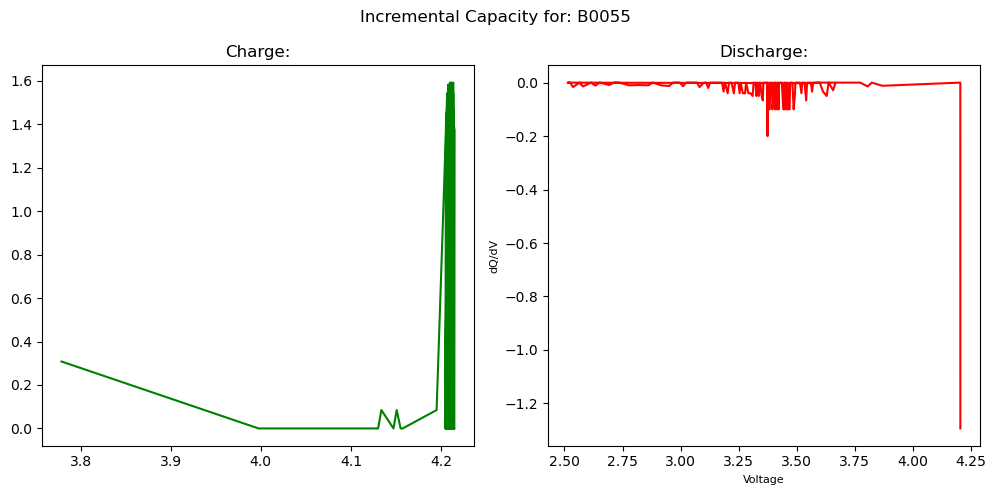

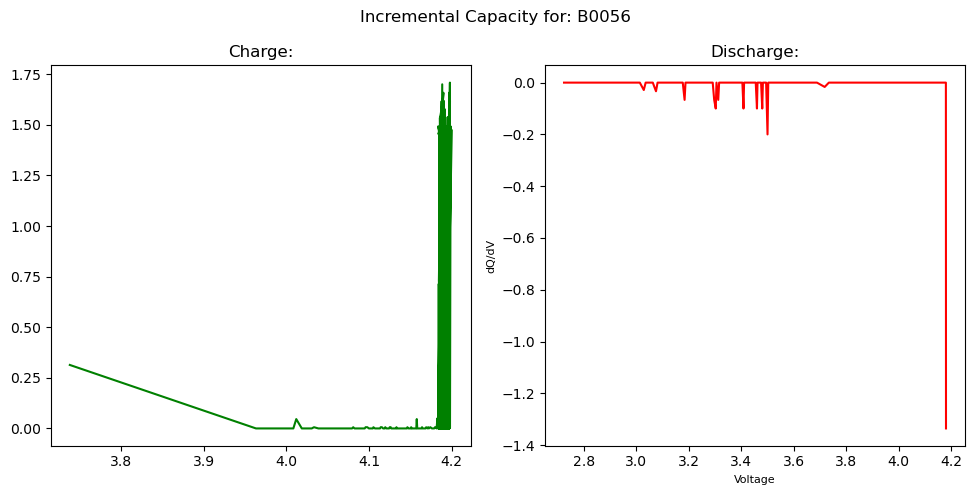

In [309]:

for bat_id in ch_bat_data.keys():
    pdQdV = ch_bat_data[bat_id]['dQ/dV']
    ndQdV = dch_bat_data[bat_id]['dQ/dV']
    pV = ch_bat_data[bat_id]['Voltage']
    nV = dch_bat_data[bat_id]['Voltage']

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    plt.xlabel('Voltage', fontsize = 8)
    plt.ylabel('dQ/dV', fontsize = 8)
    
    plt.suptitle(f'Incremental Capacity for: {bat_id}')
    
    plt.subplot(1,2,1)
    plt.title("Charge:")
    plt.plot(pV, pdQdV, color = 'green')
    
    plt.subplot(1,2,2)
    plt.title("Discharge:")
    plt.plot(nV, ndQdV, color = 'red')
    
    plt.subplots_adjust(left=0.1, right=0.9, 
                    top=0.9, bottom=0.1, 
                    wspace=0.4, hspace=0.4)
    
    plt.tight_layout()
    plt.show()

In [ ]:
############################################################

# Question c) Solution

In [331]:
cap = pd.read_csv("metadata.csv")[['type', 'start_time', 'battery_id', 'filename', 'Capacity', 'Re', 'Rct']]
cap1 = cap.loc[cap['type'] != 'charge']
cap1['start_time'] = cap1['start_time'].apply(convert_time)
cap1 = cap1.dropna(subset='start_time')
cap1 = cap1.sort_values(by= 'battery_id')
cap1.head(5)

C:\Users\Jeroen\AppData\Local\Temp\ipykernel_22548\1679850384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap1['start_time'] = cap1['start_time'].apply(convert_time)


type          start_time battery_id   filename            Capacity  \
5259  discharge 2008-04-26 01:04:35      B0005  05260.csv  1.7517304870664143   
5541  impedance 2008-05-15 14:38:58      B0005  05542.csv                 NaN   
5539  impedance 2008-05-15 11:10:28      B0005  05540.csv                 NaN   
5538  discharge 2008-05-15 10:20:03      B0005  05539.csv   1.412409228794446   
5537  impedance 2008-05-15 09:48:03      B0005  05538.csv                 NaN   

                        Re                  Rct  
5259                   NaN                  NaN  
5541   0.06260506440345279  0.08502111899525971  
5539   0.06134389439332634  0.07989290542746168  
5538                   NaN                  NaN  
5537  0.058400743519397356  0.08632938236969102

In [329]:
cond = cap1['Re'].notna() & cap1['Rct'].notna() & cap1['Capacity'].shift(-1).notna()
con_1 = cond.tolist()
cap1['Cond'] = con_1
cap1['Cond'] = cap1['Cond'] | cap1['Cond'].shift(1, fill_value=False)
cap2 = cap1.loc[cap1['Cond']==True]
cap2.head(10)

type          start_time battery_id   filename            Capacity  \
5539  impedance 2008-05-15 11:10:28      B0005  05540.csv                 NaN   
5538  discharge 2008-05-15 10:20:03      B0005  05539.csv   1.412409228794446   
5535  impedance 2008-05-15 06:14:38      B0005  05536.csv                 NaN   
5534  discharge 2008-05-15 05:24:04      B0005  05535.csv   1.417429032731308   
5531  impedance 2008-05-15 01:18:37      B0005  05532.csv                 NaN   
5530  discharge 2008-05-15 00:27:55      B0005  05531.csv  1.4229203181741186   
5527  impedance 2008-05-14 20:22:30      B0005  05528.csv                 NaN   
5526  discharge 2008-05-14 19:31:39      B0005  05527.csv    1.42806487344776   
5523  impedance 2008-05-14 15:26:13      B0005  05524.csv                 NaN   
5522  discharge 2008-05-14 14:35:22      B0005  05523.csv  1.4333958900838095   

                       Re                  Rct  Cond  
5539  0.06134389439332634  0.07989290542746168  True  
5538                  NaN                  NaN  True  
5535  0.05920398197966059  0.08007181105183933  True  
5534                  NaN                  NaN  True  
5531  0.05979534226516758  0.07964682734703848  True  
5530                  NaN                  NaN  True  
5527  0.05834271794334396  0.07994246159333938  True  
5526                  NaN                  NaN  True  
5523  0.06134060755888107  0.07733665024296885  True  
5522                  NaN                  NaN  True

In [323]:
dfn = cap2[['battery_id', 'Capacity']].dropna()
bat_id = dfn['battery_id']
bat_id = bat_id.tolist()
Re = cap2['Re']
Re = Re.dropna().tolist()
Rct = cap2['Rct']
Rct = Rct.dropna().tolist()
Cap = cap2['Capacity']
Cap = Cap.dropna().tolist()
R = {
    'Bat_ID' : bat_id,
    'Re' : Re,
    'Rct' : Rct,
    'Capacity' :Cap
}

len(R['Bat_ID'])

cap_df = pd.DataFrame(R)
cap_df.head(5)

Bat_ID                   Re                  Rct            Capacity
0  B0005  0.06134389439332634  0.07989290542746168   1.412409228794446
1  B0005  0.05920398197966059  0.08007181105183933   1.417429032731308
2  B0005  0.05979534226516758  0.07964682734703848  1.4229203181741186
3  B0005  0.05834271794334396  0.07994246159333938    1.42806487344776
4  B0005  0.06134060755888107  0.07733665024296885  1.4333958900838095

In [355]:
def capacity_pred(bat_id):    
    try:
        re = cap_df['Re'].loc[cap_df['Bat_ID'] == bat_id].tolist()
        rct = cap_df['Rct'].loc[cap_df['Bat_ID'] == bat_id].tolist()
        cap = cap_df['Capacity'].loc[cap_df['Bat_ID'] == bat_id].tolist()
        Re, Rct, Cap = [], [], []
        for i in range(len(re)):
            Re.append(float(re[i]))
            Rct.append(float(rct[i]))
            Cap.append(float(cap[i]))
        R = []
        for i in range(len(Re)):
            R.append([Re[i],Rct[i]])

        x= np.array(R)
        y= np.array(Cap)

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)
        from sklearn.linear_model import LinearRegression
        lr_clf = LinearRegression()

        lr_clf.fit(x_train, y_train)
        pred = lr_clf.predict(x_test)
        print(f"-------- For Battery: {bat_id} --------- \n")
        print("The score of model is:")
        print(lr_clf.score(x_test, y_test),"\n")
        for i in range(len(y)):
            print(f"The Capacity prediction for values {i} is:" , pred[i])
            print(f"The actual Capacity value for values {i}:", y_test[i])
            print("")
    except ValueError as e:
        print(f"Battery {bat_id} doesnt exist. Error: {e}")

In [357]:
try:
    capacity_pred('B0007')
except IndexError as e:
    print("Reached the end")

-------- For Battery: B0007 --------- 

The score of model is:
0.8411261923210962 

The Capacity prediction for values 0 is: 1.5913363378184608
The actual Capacity value for values 0: 1.5799737147242376

The Capacity prediction for values 1 is: 1.6893427557243457
The actual Capacity value for values 1: 1.723900324588418

The Capacity prediction for values 2 is: 1.5546565211633099
The actual Capacity value for values 2: 1.4827874322228984

The Capacity prediction for values 3 is: 1.7828159658726834
The actual Capacity value for values 3: 1.8116056333939583

The Capacity prediction for values 4 is: 1.6964922600845822
The actual Capacity value for values 4: 1.7285642277717963

The Capacity prediction for values 5 is: 1.686573884406195
The actual Capacity value for values 5: 1.641119179218384

The Capacity prediction for values 6 is: 1.6540124876878977
The actual Capacity value for values 6: 1.6888211161855506

The Capacity prediction for values 7 is: 1.6939149674712104
The actual Capacity